<a href="https://colab.research.google.com/github/DSWoodin/Practice/blob/main/PKNU_5th/02_ML/04_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 강의 분량
* 07월15일(월) 4시간 30분

### 강의 자료
* (수정)파이썬머신러닝04_1.ipynb

### 이 장에서 배우는 것

* 분류(Classification) 개요
* 결정트리 개념
* 결정트리 모델 DesicionTreeClassifier()
* 결정트리 시각화 export_graphvix(), graphviz.Source()
* 규칙 노드 분할 제약 max_depth, min_samples_split, min_samples_leaf
* 피처의 중요도 확인 -> 모델 객체의 feature_importances_ 속성
* 분류 테스트용 데이터 make_classification() 시각화로 과적합(Overfitting) 확인
* Classifier의 Decision Boundary를 색상과 경계로 나타내 시각화 -> contourf() 활용
* 과적합의 의미
* 결정 트리 실습 - 사용자 행동 인식 데이터셋
* GridSearchCV 활용 최적 하이퍼 파라미터 적용, feature_importances_ 확인
* 앙상블 학습 개요
* 보팅 방식의 앙상블 VotingClassifier와 단일 분류기(로지스틱 회귀, KNN) 비교
* 배깅 방식의 앙상블 RandomForestClassifier + GridSearchCV + feature_importances_
* 부스팅 방식의 앙상블 GradientBoostingClassifier, XGBClassifier, LGBMClassifier
* 파이썬 래퍼 XGBoost vs. 사이킷런 래퍼 XGBoost
* 베이지안 최적화 HyperOpt

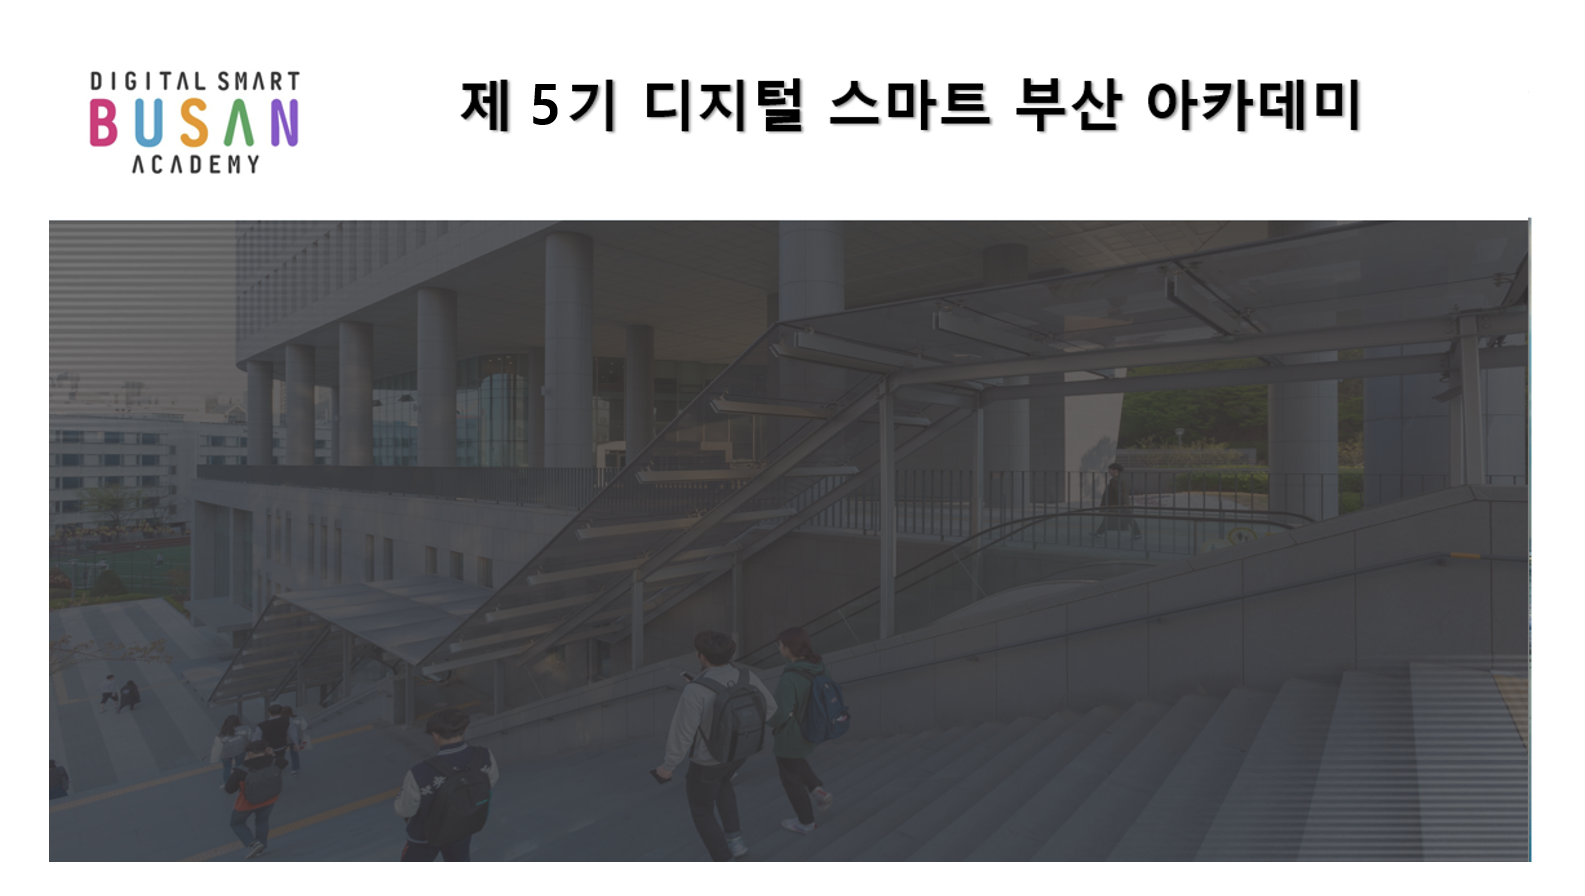

# 4장. 분류

# **01 분류(Classification)의 개요**
* 지도학습: 레이블(Label)이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식
  * **분류(Classification)  
   : 기존 데이터가 어떤 레이블에 속하는지 패턴을 알고리즘으로 인지한 뒤에 새롭게 관측된 데이터에 대한 레이블을 판별**

* 분류에 해당하는 머신러닝 알고리즘
  * 베이즈(Bayes)통계와 생성 모델에 기반한 **나이브 베이즈**
  * 독립변수와 종속변수의 선형 관계에 기반한 **로지스틱 회귀(Logistic Regression)**
  * 데이터 균일도에 따른 규칙 기반의 **결정 트리(Decision Tree)**
  * 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 **서포트 벡터 머신(Support Vector Machine)**
  * 근접 거리를 기준으로 하는 **최소 근접(Nearest Neighbor) 알고리즘**
  * **심층 연결 기반의 신경망(Neural Network)**
  * 서로 다른(또는 같은) 머신러닝 알고리즘을 결합한 **앙상블(Ensemble)**

* 본 장에서는 **앙상블** 방법을 집중적으로 다룸
  * 정형 데이터의 예측 분석 영역에서 매우 높은 예측 성능을 보여주고 있음
  * 배깅(Bagging)과 부스팅(Boosting) 방식으로 나뉨

* **배깅(Bagging)**
  * 대표적인 알고리즘  
  : 랜덤 포레스트(Random Forest)
  * 랜덤 포레스트 장점  
  : 뛰어난 예측 성능, 상대적으로 빠른 수행 시간, 유연성
  * 하지만 근래의 앙상블 방법은 부스팅 방식으로 지속 발전

* **부스팅(Boosting)**  
  * 대표적인 알고리즘
  : 그래디언트 부스팅(Gradient Boosting)
  * 그래디언트 부스팅 장점  
  : 뛰어난 예측 성능
  * 그래디언트 부스팅 단점  
  : 수행 시간이 오래 걸림 -> 최적화 모델 튜닝 어려움
  * 이를 개선시키기 위해 XgBoost, LightGBM 등장

* 이 장에서 배울 앙상블 알고리즘
  * **랜덤 포레스트**
  * **그래디언트 부스팅(Gradient Boosting)**
  * **XGBoost**
  * **LightGBM**
  * **스태킹(Stacking)**

* 앙상블은 대부분 동일한 알고리즘 결합함
* 기본 알고리즘은 결정트리
* 앙상블은 매우 많은 여러 개의 약한 학습기를 결합해 오류가 발생한 부분에 대한 가중치를 업데이트 하면서 예측 성능을 향상시킴

* **[참고] 배깅과 부스팅**

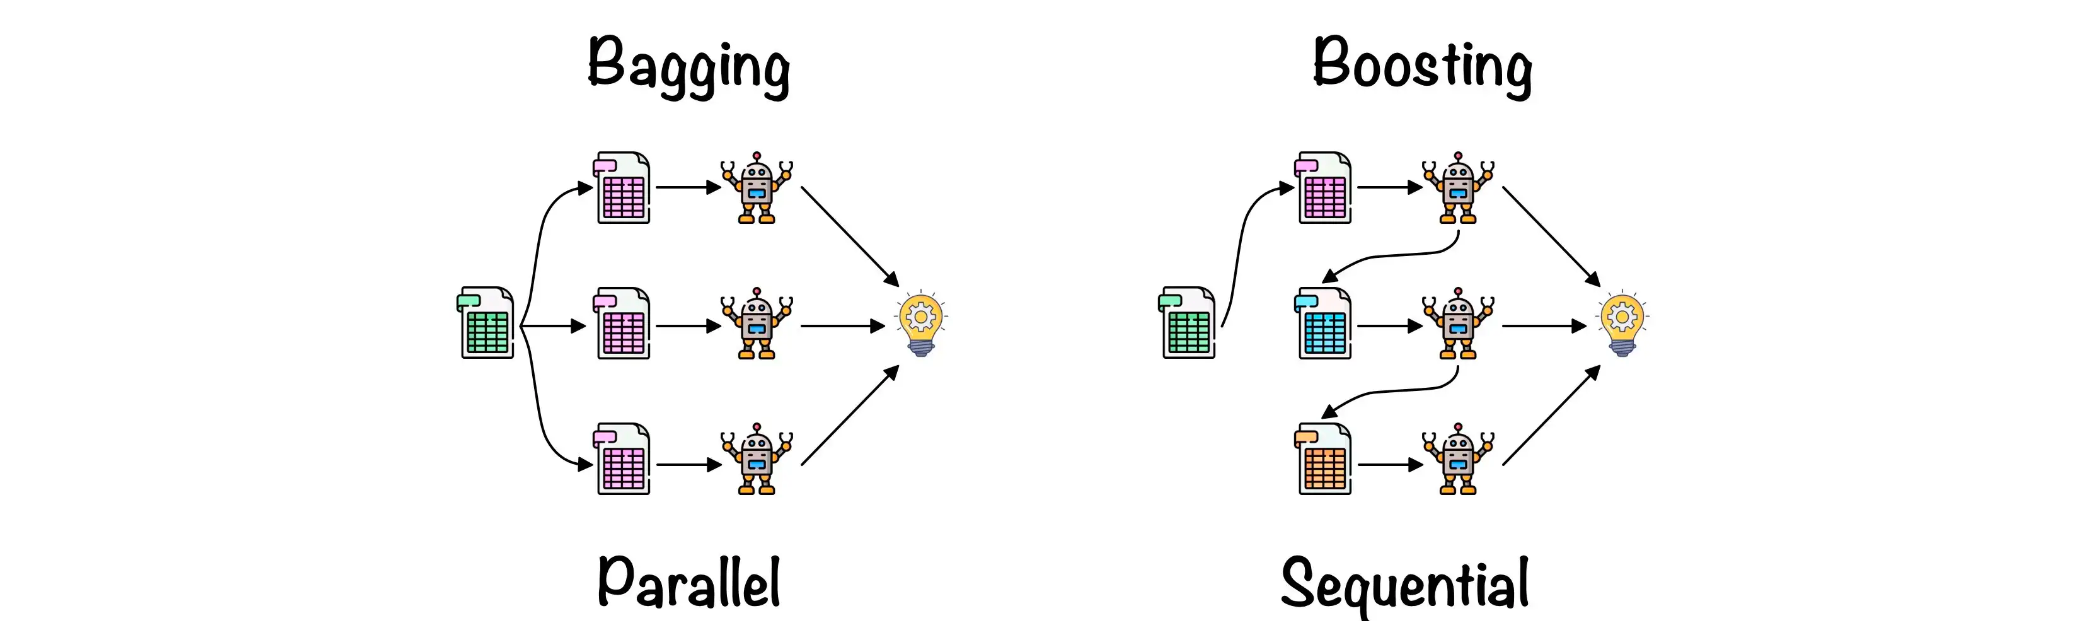

* Bagging은 Bootstrap Aggregation의 약자입니다. 배깅은 샘플을 여러 번 뽑아(Bootstrap) 각 모델을 학습시켜 결과물을 집계(Aggregration)하는 방법

  * [참고: Bootstrap 샘플링]: 데이터 샘플로부터 반복적으로 무작위 표본 추출을 수행하는 방법. 각 추출에서는 원본 데이터의 크기와 동일한 크기의 샘플을 생성하며, 추출은 복원 추출(하나의 데이터 포인트가 여러 번 선택될 수 있음) 방식으로 이루어짐


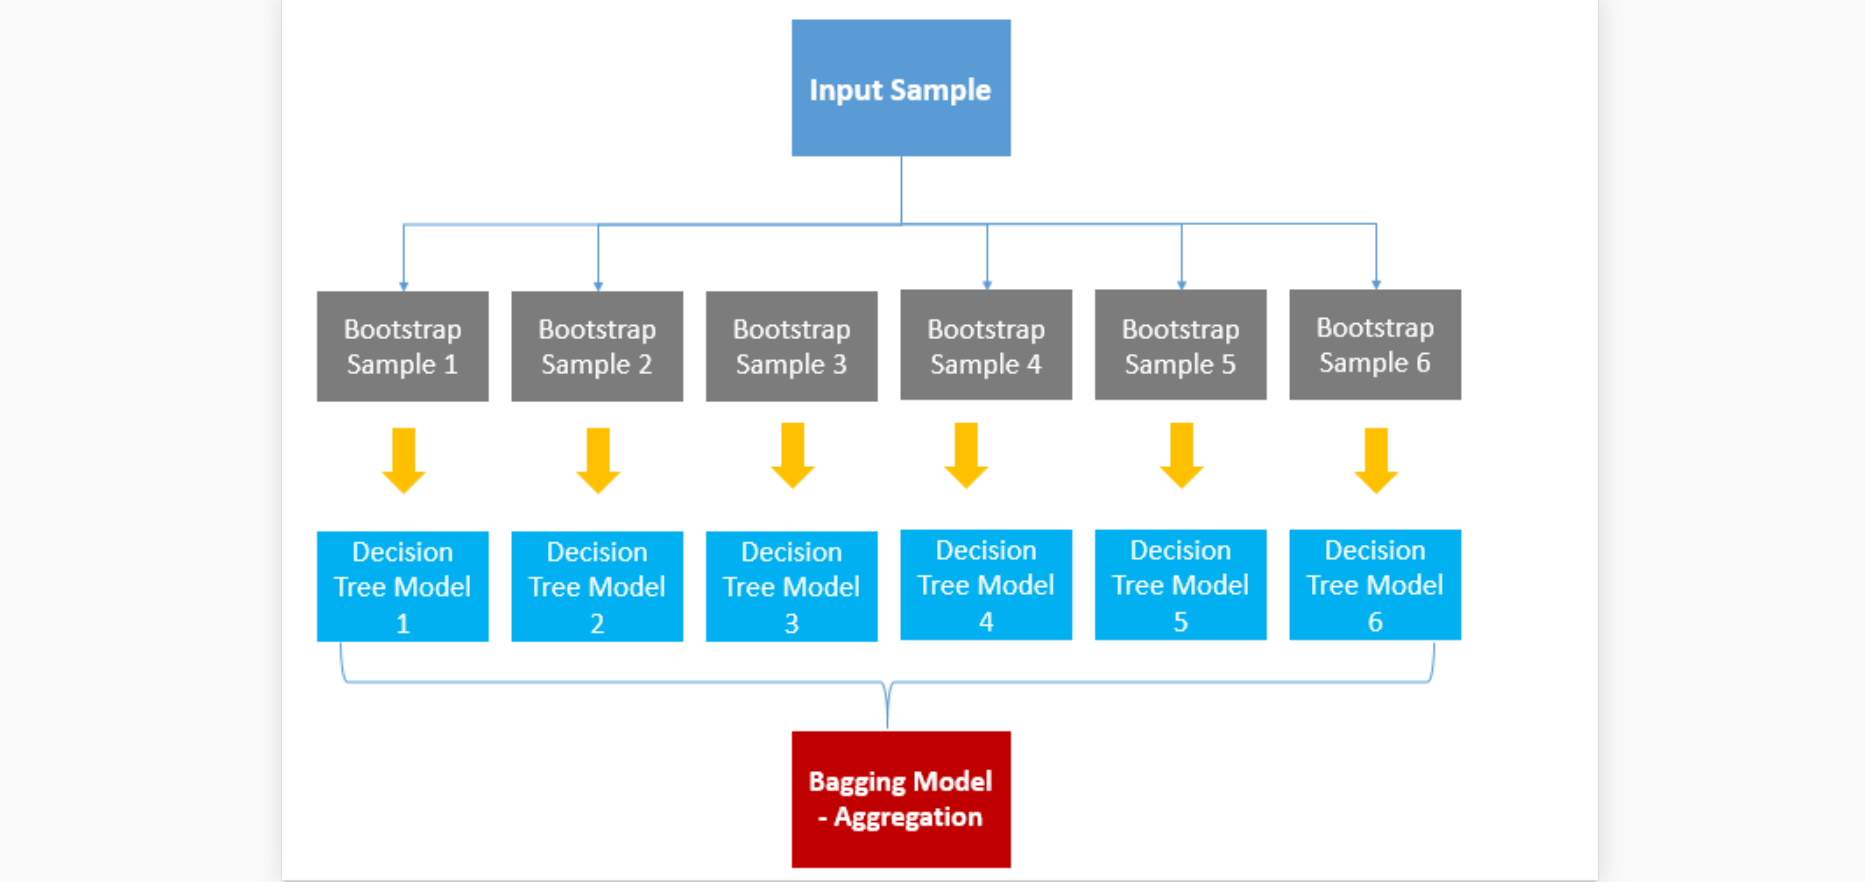



* 부스팅(Boosting)은 가중치를 활용하여 약 분류기를 강 분류기로 만드는 방법
  * 배깅은 Deicison Tree1과 Decision Tree2가 서로 독립적으로 결과를 예측
    * 여러 개의 독립적인 결정 트리가 각각 값을 예측한 뒤, 그 결과 값을 집계해 최종 결과 값을 예측하는 방식
  * 부스팅은 모델 간 팀워크가 이루어진다.
    * 처음 모델이 예측을 하면 그 예측 결과에 따라 데이터에 가중치가 부여되고, 부여된 가중치가 다음 모델에 영향을 준다.
    * 잘못 분류된 데이터에 집중하여 새로운 분류 규칙을 만드는 단계를 반복

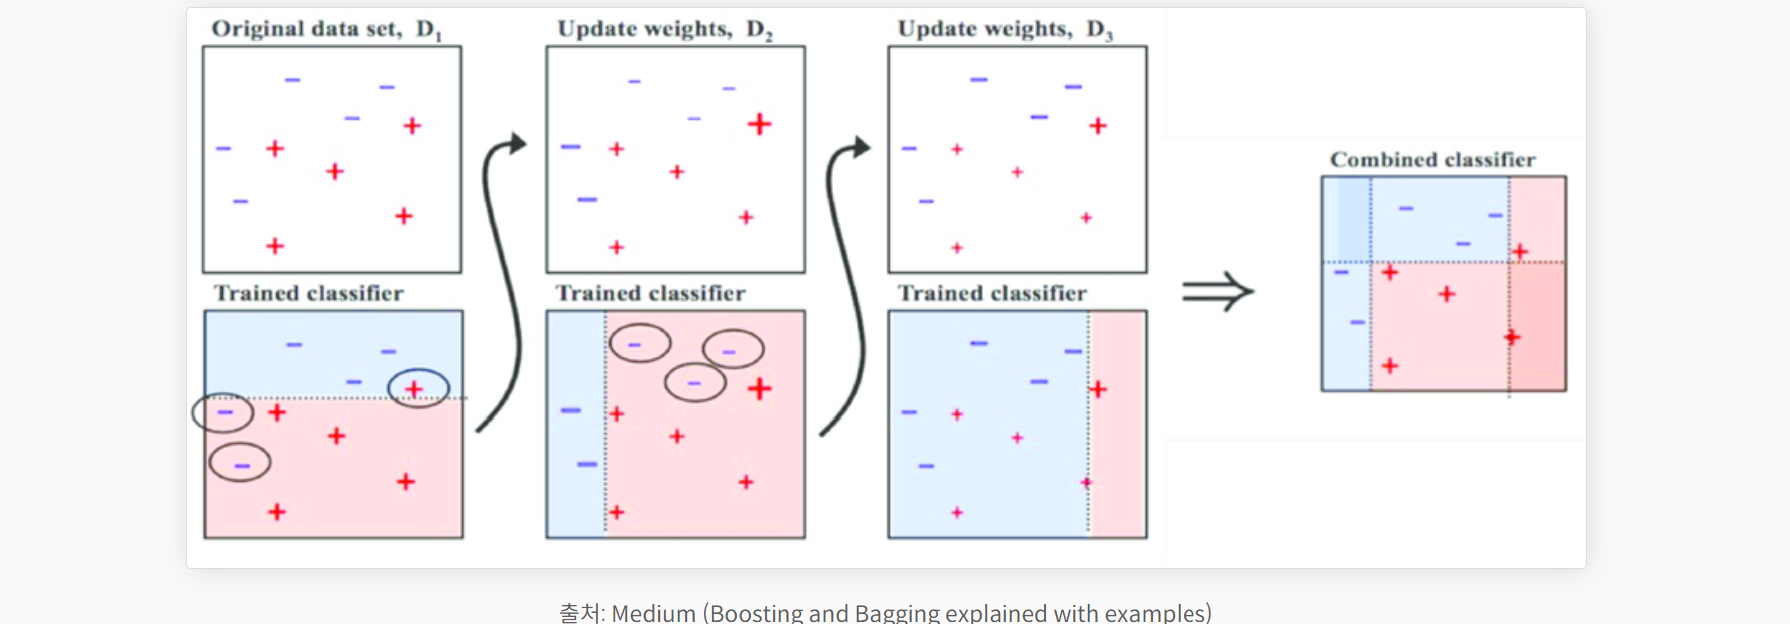

* **배깅은 병렬로 학습**하는 반면, **부스팅은 순차적으로 학습**. 한번 학습이 끝난 후 결과에 따라 가중치를 부여. 그렇게 부여된 가중치가 다음 모델의 결과 예측에 영향을 준다.

* 오답에 대해서는 높은 가중치를 부여하고, 정답에 대해서는 낮은 가중치를 부여
  * 따라서 오답을 정답으로 맞추기 위해 오답에 더 집중할 수 있게 되는 것

* 부스팅은 배깅에 비해 error가 적다. 즉, 성능이 좋다.
  * 하지만 속도가 느리고 오버 피팅이 될 가능성이 있다.
* 그렇다면 실제 사용할 때는 배깅과 부스팅 중 어떤 것을 선택해야 할까?
  * 상황에 따라 다르다고 할 수 있다.
  * 개별 결정 트리의 낮은 성능이 문제라면 부스팅이 적합하고, 오버 피팅이 문제라면 배깅이 적합.

# 02 결정트리
* 결정트리(Decision tree): 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리(Tree) 기반의 분류 규칙을 만드는 것


* 결정 트리의 구조
  * 규칙노드(Decision Node): 규칙 조건
  * 리프노드(Leaf Node): 결정된 클래스 값
  * 새로운 규칙마다 서브 트리(Sub Tree)가 생성됨

* 하지만 트리의 깊이(depth)가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높음 (과적합)
* 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙 정해져야 함
* 최대한 균일한 데이터 세트를 구성할 수 있도록 분할(split) 필요

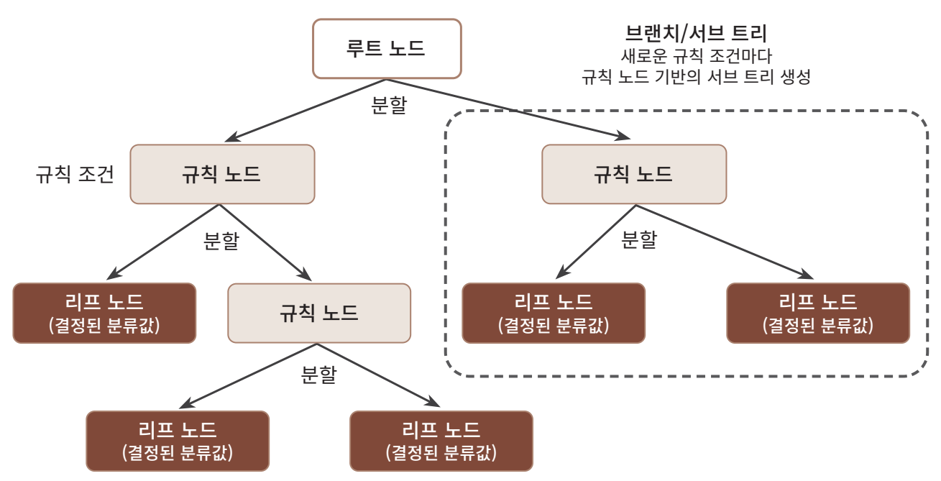

* 리프(leaf) 노드
  * 최종 클래스(레이블) 값이 결정되는 노드
  * 더 이상 자식 노드가 없는 노드
  * 리프 노드가 되려면 오직 하나의 클래스 값으로 최종 데이터가 구성되거나 리프 노드가 될 수 있는 하이퍼 파라미터 조건을 충족하면 된다.
* 브랜치(branch) 노드
  * 자식 노드가 있는 노드
  *자식 노드를 만들기 위한 분할 규칙 조건을 가짐

* 균일한 데이터란?
  * 균일도 순: C > B > A
  * A는 데이터 판단하기 위해 추가 정보 필요



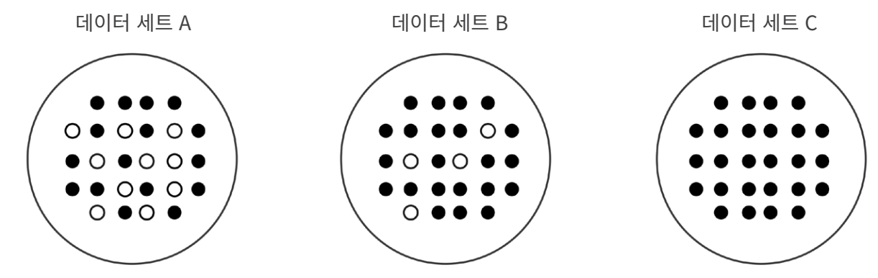

* 결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만듦
* 정보의 균일도를 측정하는 대표적인 방법  
: 엔트로피를 이용한 정보 이득(Information Gain)지수, 지니계수

  * **정보이득**은 엔트로피라는 개념을 기반
    * 엔트로피는 주어진 데이터 집합의 혼잡도를 의미
    * 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮다.
    * 정보 이득 지수는 1에서 엔트로피 지수를 뺀 값. 즉, **1-엔트로피 지수**
    * 결정 트리는 이 정보 이득 지수로 분할 기준을 정함. 즉, 정보 이득이 높은 속성을 기준으로 분할

  * **지니계수**는 원래 경제학에서 불평등 지수를 나타낼 때 사용하는 계수
    * 경제학자인 코라도 지니(Corrado Gini)의 이름에서 딴 계수로서 0이 가장 평등하고 1로 갈수록 불평등하다.
    * 머신러닝에 적용될 때는 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석해 지니 계수가 낮은 속성을 기준으로 분할한다.

* 사이킷런에서 제공하는 결정 트리 알고리즘  
: DecisionTreeClassifier <- 지니 계수 이용하여 데이터 세트 분할함

* **즉, '정보이득이 높은 속성 기준' 혹은 ' 지니계수가 낮은 속성 기준'으로 반복적으로 분할함. 데이터가 모두 특정 분류에 속하면 분류를 멈추고 분류 결정함.**

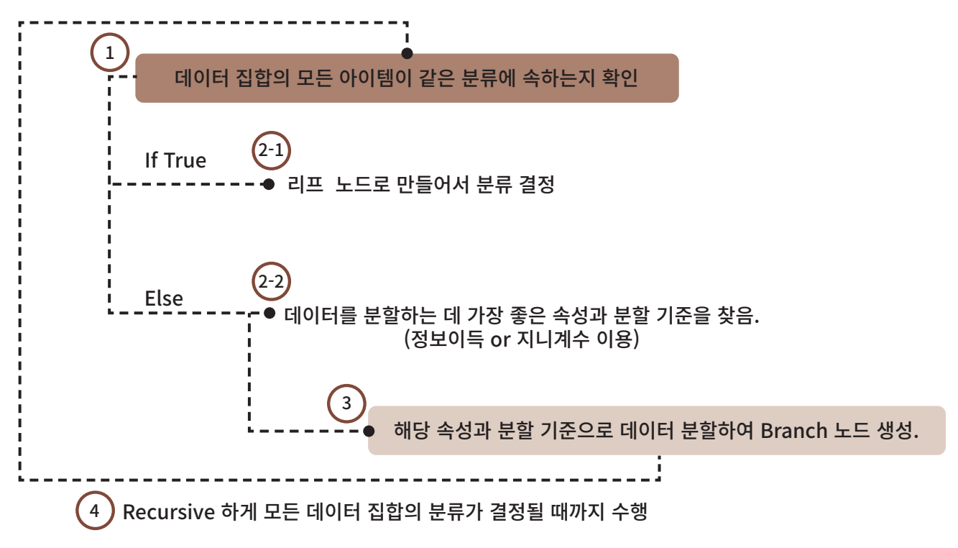

### 결정 트리 모델의 특징
* 결정 트리의 장점  
  * 알고리즘이 쉽고 직관적
  * 룰이 매우 명확함
  * 시각화로 표현 가능
  * 전처리 필요 없음 (각 피처의 스케일링, 정규화...)
  
* 결정 트리의 단점
  * 과적합으로 정확도가 떨어짐 --> 트리의 크기를 사전에 제한하는 튜닝 필요
  * 피처가 많고 균일도가 다양하게 존재하면 깊이가 깊어지고 복잡해짐

### 결정 트리 파라미터
* 사이킷런에서 결정 트리 알고리즘 제공
  * DecisionTreeClassifier: 분류를 위한 클래스
  * DecisionTreeRegressor: 회귀를 위한 클래스
  * 둘 모두 동일한 파라미터 사용함


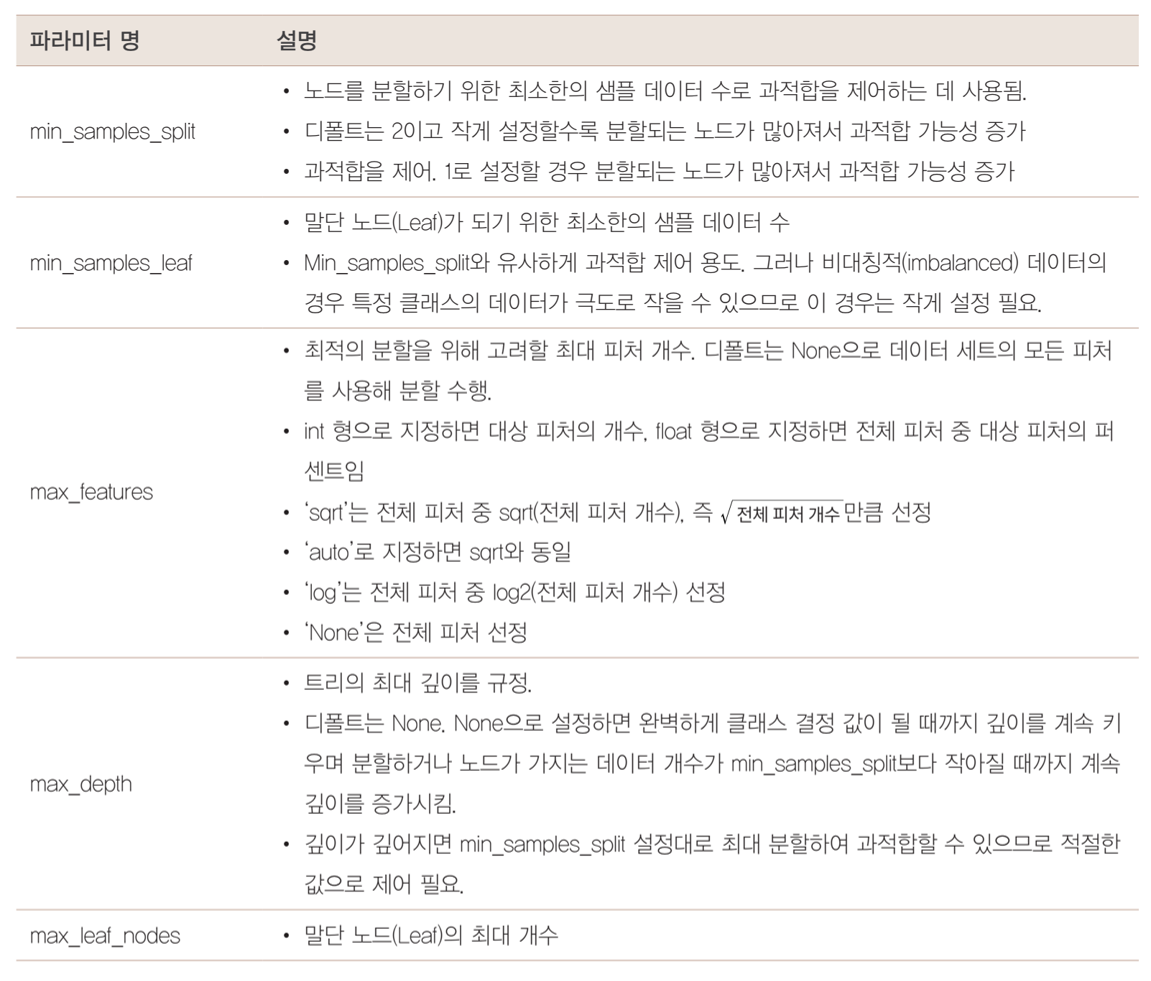

### 결정 트리 모델의 시각화(Decision Tree Visualization)
* 결정 트리 알고리즘이 어떠한 규칙을 가지고 트리를 생성하는지 시각적으로 볼 수 있는 방법  
: Graphiviz 패키지 사용
* 사이킷런은 Graphviz 패키지와 쉽게 인터페이스할 수 있도록 export_graphviz() API를 제공
  * 함수 인자로 학습이 완료된 Estimator, 피처의 이름 리스트, 레이블 이름 리스트를 입력하면 학습된 결정 트리 규칙을 실제 트리 형태로 시각화해 보여준다.

In [ ]:
# Graphviz 를 이용해 붓꽃 데이터 세트에 결정 트리, 즉 DecisionTreeClassifer 를 적용할 때 어떻게 서브 트리가 구성되고 만들어지는지 시각화
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습.
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(random_state=156)

* 사이킷런의 트리모듈에서 Graphiviz 이용하기 위한 함수 제공  
: export_graphviz() 함수
  * 그래프 형태로 시각화할 수 있는 출력 파일을 생성함

In [ ]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
# 인자: 학습 완료된 estimator, output 파일 명, 결정 클래스의 명칭, 피처의 명칭
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names , \
feature_names = iris_data.feature_names, impurity=True, filled=True)

* 생성된 출력 파일 ‘tree.dot’ 을 다음과 같이 Graphviz 의 파이썬 래퍼 모듈을 호출해 결정 트리의 규칙을 시각적으로 표현할 수 있다.

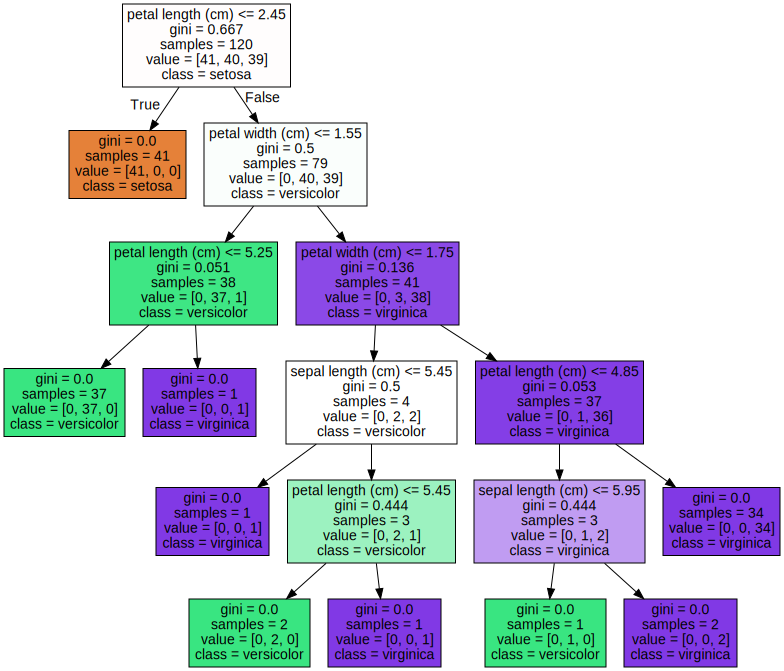

In [ ]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

* 노드 내에 기술된 지표의 의미
  * petal length(cm) <= 2.45와 같이 피처의 조건이 있는 것은 자식 노드를 만들기 위한 규칙 조건입니다. 이 조건이 없으면 리프 노드입니다.
  * gini는 다음의 value=[]로 주어진 데이터 분포에서의 지니 계수입니다.
  * samples는 현 규칙에 해당하는 데이터 건수입니다.
  * value=[]는 클래스 값 기반의 데이터 건수입니다. 붓꽃 데이터 세트는 클래스 값으로 0,1,2를 가지고 있으며, 0:Setosa, 1:Versicolor, 2:Virginica 품종을 가리킵니다. 만일 Value=[41,40,39]라면 클래스 값의 순서로 Setosa 41개, Versicolor 40개, Virginica 39개로 데이터가 구성돼 있다는 의미입니다.


* 각 노드의 색깔은 붓꽃 데이터의 레이블 값을 의미
  * 주황색은 0: Setosa, 초록색은 1:Versicolor, 보라색은 2: Virginica 레이블을 나타낸다.
  * 색깔이 짙어질수록 지니 계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많다는 의미

* 1) max_depth에 따른 규칙 트리의 변화
  * 결정트리는 규칙 생성 로직을 미리 제어하지 않으면 완벽하게 클래스 값을 구별해내기 위해 트리 노드를 계속해서 만들어 감
  * 이로인해 복잡한 규칙 트리가 만들어짐
  * 쉽게 과적합되는 문제 생김


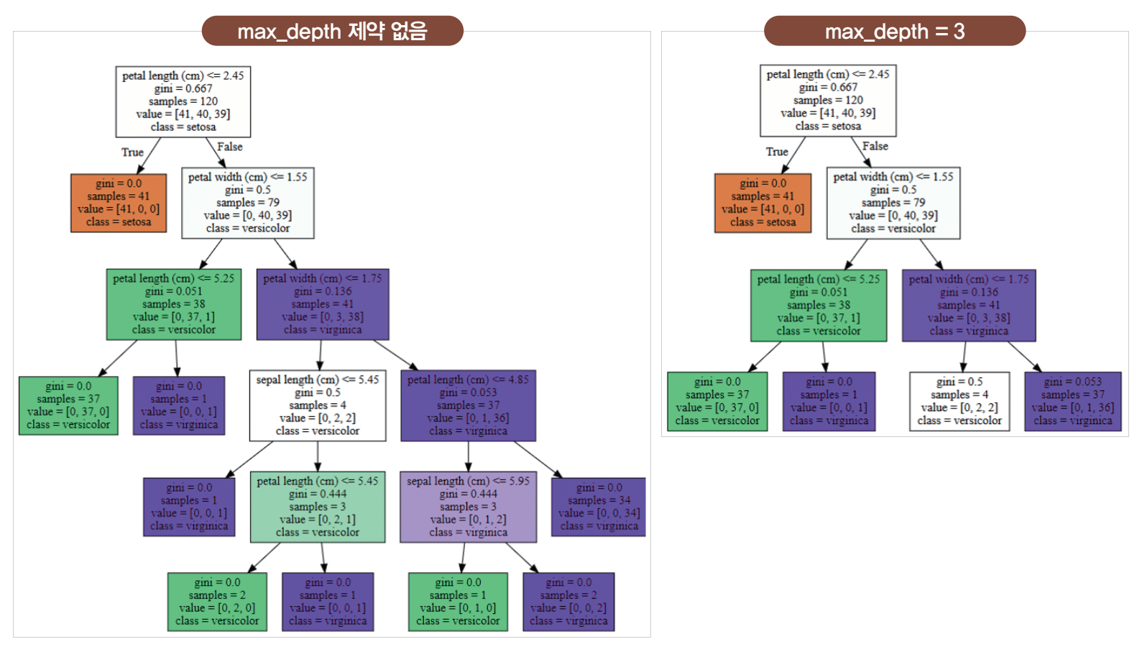

* 2) min_samples_split 변경에 따른 규칙 트리의 변화
  * min_sampels_split: 자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 개수

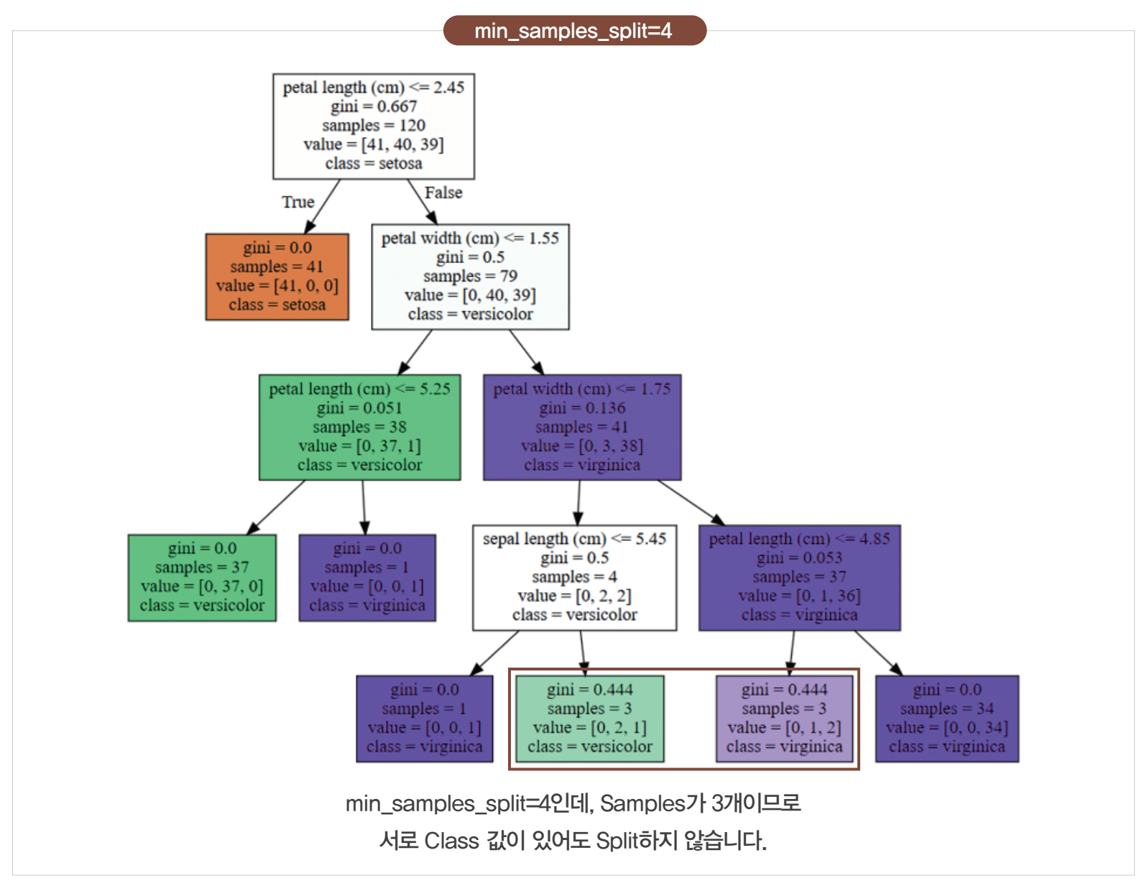

* 3) min_sampels_leaf 변경에 따른 결정 트리의 변화
  * min_sampels_leaf  
  : 어떤 노드가 분할할 경우, 왼쪽, 오른쪽 자식 노드 중 하나라도 지정된 값보다 더 작은 샘플 데이터 건수를 갖게 된다면, 해당 노드는 더 이상 분할하지 않고 리프 노드가 됨.

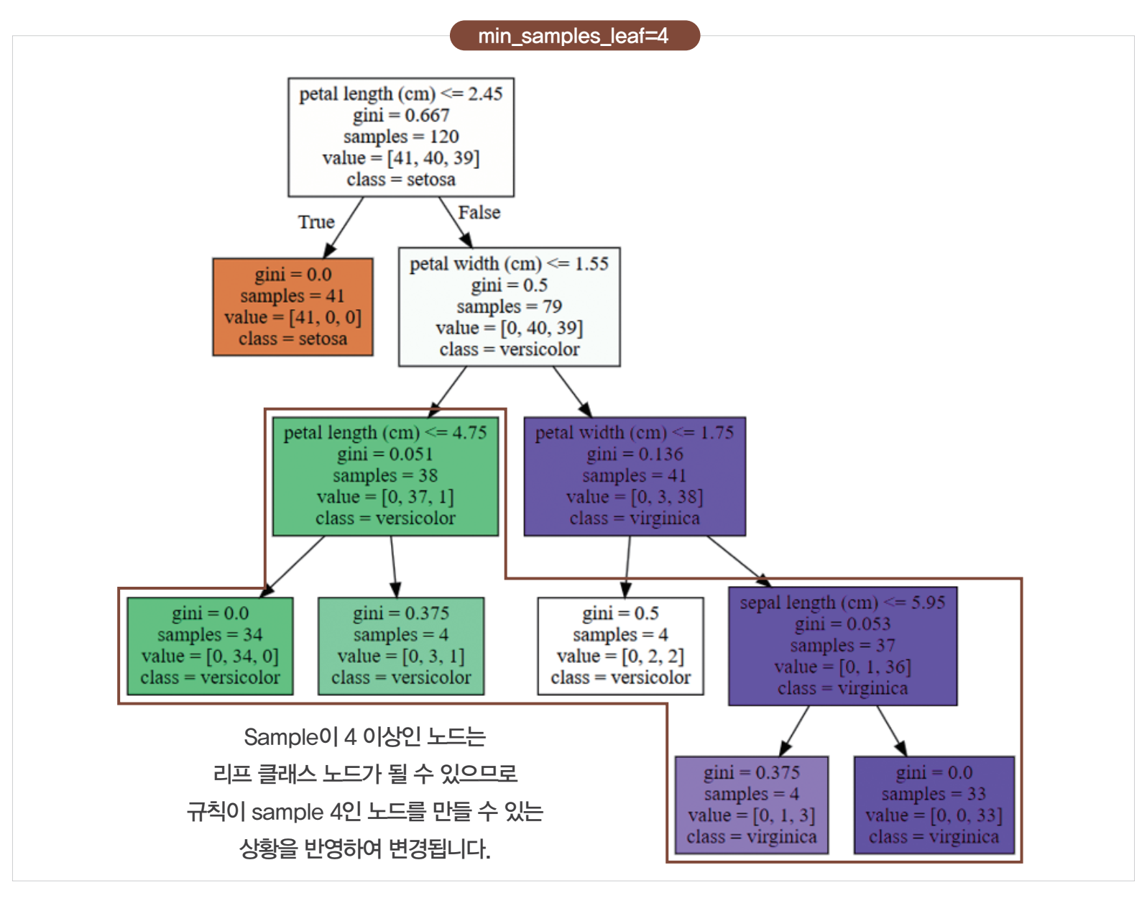

* 결정트리는 균일도에 기반해 어떠한 속성을 규칙 조건으로 선택하느냐가 중요한 요건
* 중요한 피처
  * 명확한 규칙 트리를 만드는데 기여
  * 모델을 좀 더 간결하고 이상치(Outlier)에 강한 모델을 만들 수 있음
  * 피처의 중요한 역할 지표 확인방법  
  : DecisionTreeClassifier 객체의 feature_importances_

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<Axes: >

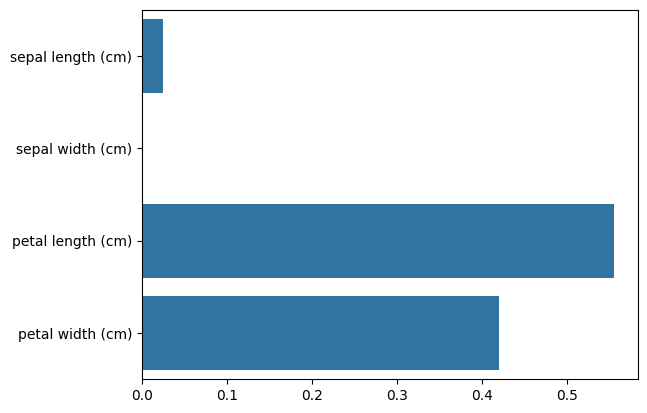

In [ ]:
# fit() 으로 학습된 DecisionTreeClassifier 객체 변수인 df_clf 에서 feature_importances_ 속성을 가져와 피처별로 중요도 값을 매핑하고 이를 막대그래프로 표현
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기
sns.barplot(x=dt_clf.feature_importances_ , y=iris_data.feature_names)


* 여러 피처들 중 petal_length 가 가장 피처 중요도가 높음을 알 수 있다.

### 결정 트리(Decision TREE) 과적합(Overfitting)
* 결정 트리가 어떻게 학습 데이터를 분할해 예측을 수행하는지 & 이로 인한 과적합 문제 시각화하기
* 사이킷런에서 분류를 위한 테스트용 데이터
: make_classification()

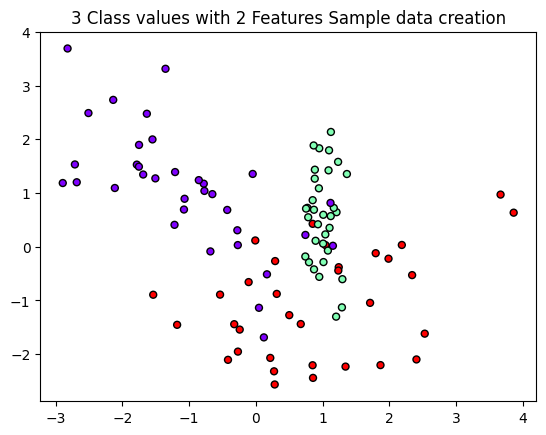

In [ ]:
# 2개의 피처가 3가지 유형의 클래스 값을 가지는 데이터 세트를 만들고 이를 그래프 형태로 시각화
# make_classification() 호출 시 반환되는 객체는 피처 데이터 세트와 클래스 레이블 데이터세트
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성.
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_classes=3, n_clusters_per_class=1,random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨.
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

* 각 파라미터 의미:

  * n_features=2: 생성할 특징의 개수 (2개)
  * n_redundant=0: 상관 관계가 있는 (redundant) 특징의 개수 (없음)
  * n_informative=2: 예측에 유용한 (informative) 특징의 개수 (모두 유용)
  * n_classes=3: 클래스의 개수 (3개)
  * n_clusters_per_class=1: 클래스당 클러스터 개수 (각 클래스는 1개의 클러스터로 구성)
  * random_state=0: 난수 생성기를 위한 시드 값 (결정론적 결과 생성)

* 각 피처가 X, Y축으로 나열된 2차원 그래프이며, 3개의 클래스 값 구분은 색깔로 돼 있다.
* 이제 X_features 와 y_labels 데이터 세트를 기반으로 결정 트리를 학습
  * 첫 번째 학습 시에는 결정 트리 생성에 별다른 제약이 없도록 결정 트리의 하이퍼 파라미터를 디폴트로 한 뒤, 결정 트리 모델이 어떠한 결정 기준을 가지고 분할하면서 데이터를 분류하는지 확인할 것

* visualize_boundary() 함수  
: 머신러닝 모델이 클래스 값을 예측하는 결정 기준을 색상과 경계로 나타내 모델이 어떻게 데이터 세트를 예측 분류하는지 잘 이해할 수 있게 해줌

In [ ]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()

    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

* 일부 이상치까지 분류하기 위해 분할이 자주 일어나서 결정 기준 경계가 매우 많아짐

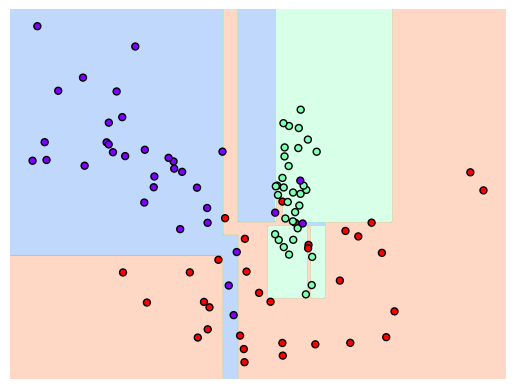

In [ ]:
# 먼저 결정 트리 생성에 별다른 제약이 없도록 하이퍼 파라미터가 디폴트인 Classifier를 학습하고 결정기준 경계를 시각화
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화.
dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

* 일부 이상치(Outlier) 데이터까지 분류하기 위해 분할이 자주 일어나서 결정 기준 경계가 매우 많아졌다.
* 결정 트리의 기본 하이퍼 파라미터 설정은 리프 노드 안에 데이터가 모두 균일하거나 하나만존재해야 하는 엄격한 분할 기준으로 인해 결정 기준 경계가 많아지고 복잡해졌다.
* 이렇게 복잡한모델은 학습 데이터 세트의 특성과 약간만 다른 형태의 데이터 세트를 예측하면 예측 정확도가 떨어지게 된다.

* 리프노트 생성 규칙을 완화하기 위해, min_samples_leaf=6으로 설정

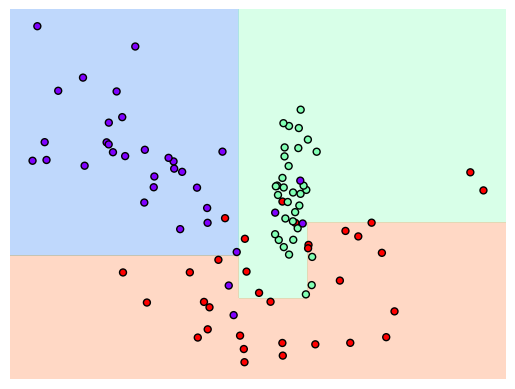

In [ ]:
# min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

* 이상치에 크게 반응하지 않으면서 좀 더 일반화된 분류 규칙에 따라 분류됐음을 알 수 있다.
* 다양한 테스트 데이터 세트를 기반으로 한 결정 트리 모델의 예측 성능은 첫 번째 모델보다는 min_samples_leaf=6으로 트리 생성 조건을 제약한 모델이 더 뛰어날 가능성이 높다.
* 왜냐하면 테스트데이터 세트는 학습 데이터 세트와는 다른 데이터 세트인데, 학습 데이터에만 지나치게 최적화된 분류기준은 오히려 테스트 데이터 세트에서 정확도를 떨어뜨릴 수 있기 때문

### 결정 트리 실습 - 사용자 행동 인식 데이터 세트(Human Activity Recognition)
* UCI 머신러닝 리포지토리(Machine Learning Repository)에서 제공하는 사용자 행동 인식(Human Activity Recognition) 데이터 세트에 대한 예측 분류 예제
  * 30명에게 스마트폰 센서를 장착한 뒤 사람의 동작과 관련된 여러 가지 피처를 수집한 데이터
  * 결정트리를 이용해 어떠한 동작인지 예측
  * [데이터셋](https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones)

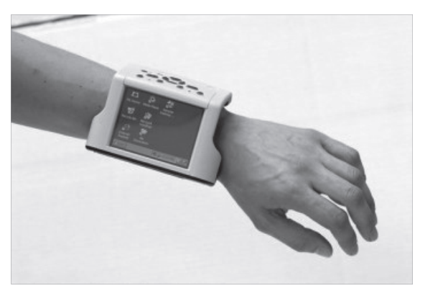

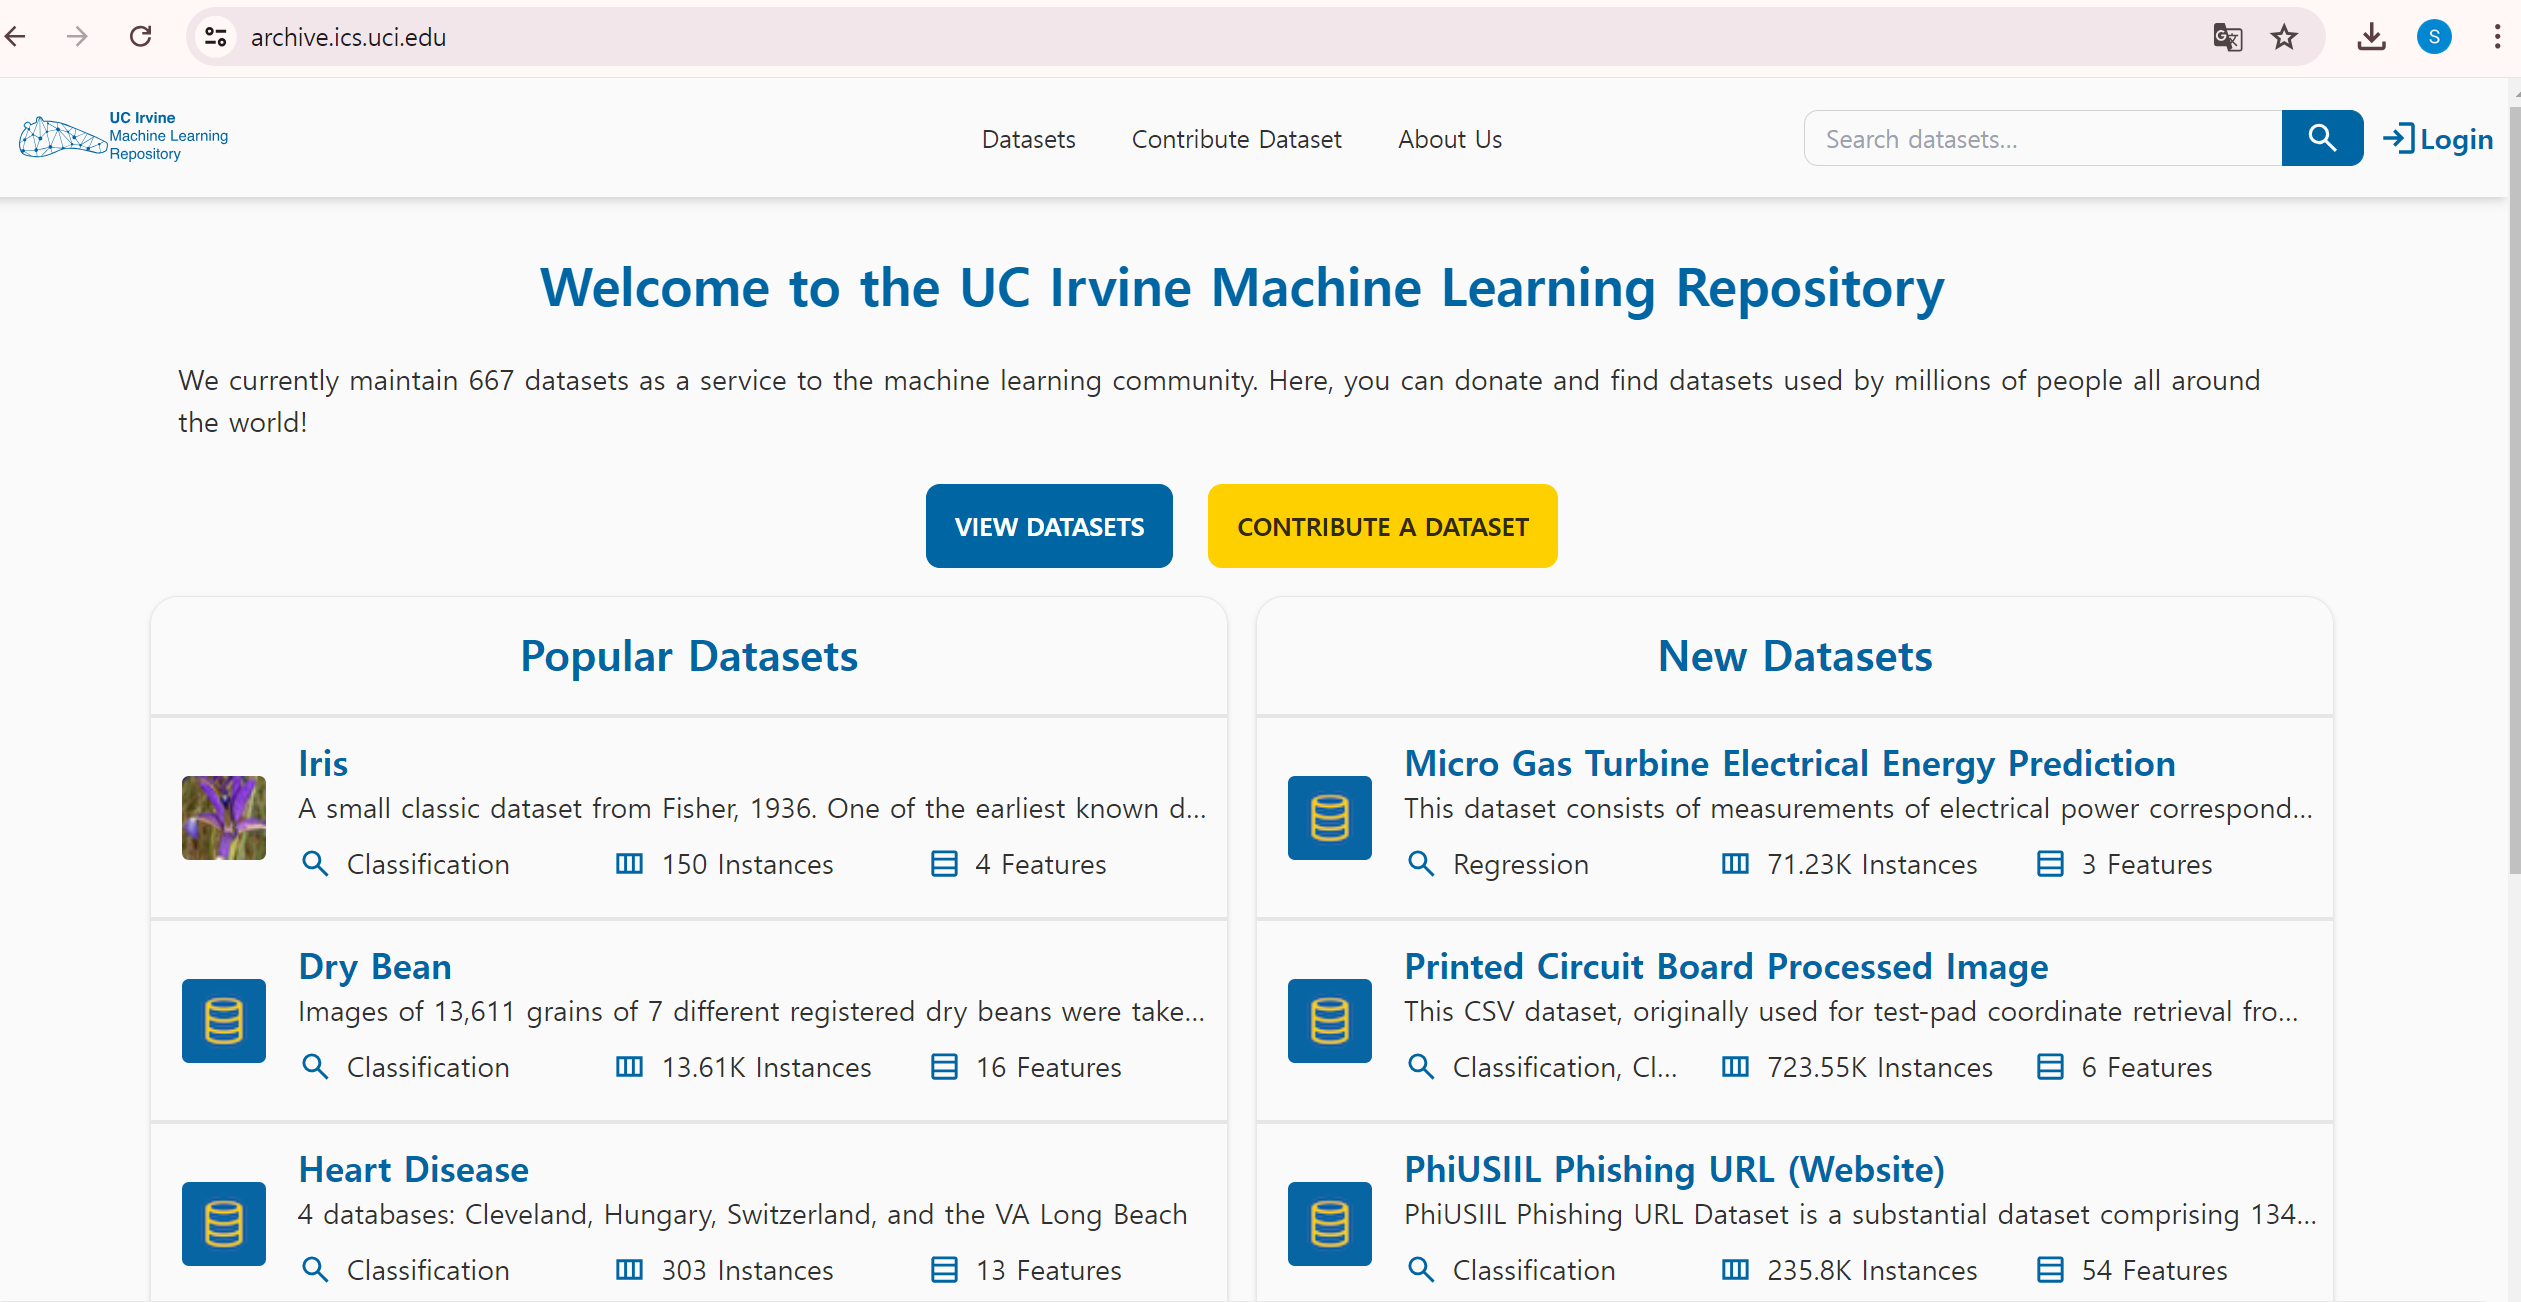

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
# 인체의 움직임과 관련된 속성의 평균/표준편차 값들
print('전체 피처명에서 10개만 추출:', feature_name[:10])


전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [2]:
feature_name_df.head()

column_index        column_name
0             1  tBodyAcc-mean()-X
1             2  tBodyAcc-mean()-Y
2             3  tBodyAcc-mean()-Z
3             4   tBodyAcc-std()-X
4             5   tBodyAcc-std()-Y

* 중복된 피처명을 확인
  * features.txt 파일은 중복된 피처명 가지고 있음
  * 원본 데이터에 중복된 Feature 명으로 인하여 신규 버전의 Pandas에서 Duplicate name 에러를 발생.

In [3]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


column_index
column_name                               
fBodyAcc-bandsEnergy()-1,16              3
fBodyAcc-bandsEnergy()-1,24              3
fBodyAcc-bandsEnergy()-1,8               3
fBodyAcc-bandsEnergy()-17,24             3
fBodyAcc-bandsEnergy()-17,32             3

* 중복 feature명에 대해서 원본 feature 명에 '_1(또는2)'를 추가로 부여하는 함수인 get_new_feature_name_df() 생성

In [4]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

* train 디렉터리에 있는 학습용 피처 데이터 세트와 레이블 데이터 세트, test 디렉터리에 있는 테스트용 피처 데이터 파일과 레이블 데이터 파일을 각각 학습/테스트용 DataFrame 생성하는 로직

In [5]:
import pandas as pd

def get_human_dataset( ):

    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])

    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성.
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('X_train.txt',sep='\s+', names=feature_name)
    X_test = pd.read_csv('X_test.txt',sep='\s+', names=feature_name)

    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('y_test.txt',sep='\s+',header=None,names=['action'])

    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

<ipython-input-4-92110e44b328>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x[1] >0 else x[0] ,  axis=1)
<ipython-input-4-92110e44b328>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])


In [6]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [7]:
print(y_train['action'].value_counts())

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


* 사이킷런의 DecisionTreeClassifier를 이용해 동작 예측 분류를 수행

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시 마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


* 결정트리의 트리 깊이(Tree Depth)가 예측 정확도에 주는 영향 확인
  * GridSearchCV를 이용해 max_depth 값 변화시키면서 예측 성능 확인

In [9]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [ 6, 8 ,10, 12, 16 ,20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)


Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치:0.8513
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


In [10]:
# GridSearchCV객체의 cv_results_ 속성을 DataFrame으로 생성.
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]


param_max_depth  mean_test_score
0               6         0.850791
1               8         0.851069
2              10         0.851209
3              12         0.844135
4              16         0.851344
5              20         0.850800
6              24         0.849440

* 테스트 데이터 세트에서 결정 트리의 정확도 측정
  * min_samples_split =16으로 고정하고 측정
  * 깊이가 깊어질수록 정확도는?

In [11]:
max_depths = [ 6, 8 ,10, 12, 16 ,20, 24]
# max_depth 값을 변화 시키면서 그때마다 학습과 테스트 셋에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=16, random_state=156)
    dt_clf.fit(X_train , y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test , pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth , accuracy))

max_depth = 6 정확도: 0.8551
max_depth = 8 정확도: 0.8717
max_depth = 10 정확도: 0.8599
max_depth = 12 정확도: 0.8571
max_depth = 16 정확도: 0.8599
max_depth = 20 정확도: 0.8565
max_depth = 24 정확도: 0.8565


* max_depth와 min_samples_split을 같이 변경하면서 정확도 성능 튜닝하기

In [12]:
params = {
    'max_depth' : [ 8 , 12, 16 ,20],
    'min_samples_split' : [16, 24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


* 테스트 데이터 세트에 해당 하이퍼파라미터 적용하기

In [13]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


* 결정 트리에서 각 피처의 중요도를 feature_importances_ 속성을 이용해서 알아보기
   * 규칙 생성에 중요하게 영향을 미치고 있는 변수들은?

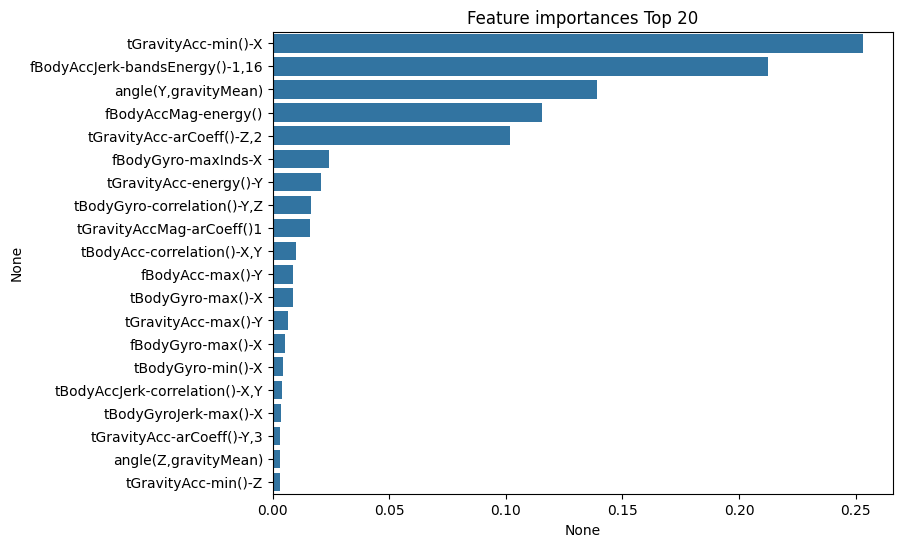

In [14]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

# 03 앙상블학습

### 앙상블 학습 개요
* 앙상블 학습(Ensemble Learning)을 통한 분류  
: 여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법
* 마치 어려운 문제의 결론을 위해 여러 전문가들이 모여 토론하고 해결(마치 집단 지성으로 어려운 문제를 쉽게 해결하는 것처럼)
* 단일 분류기보다 신뢰성이 높은 예측값을 얻음
* 정형 데이터 분류 시에는 대부분 앙상블이 뛰어난 성능을 나타내고 있음
* 앙상블 모델들: 랜덤포레스트, 그래디언트 부스팅, XGBoost, LightGBM, 스태킹 등...

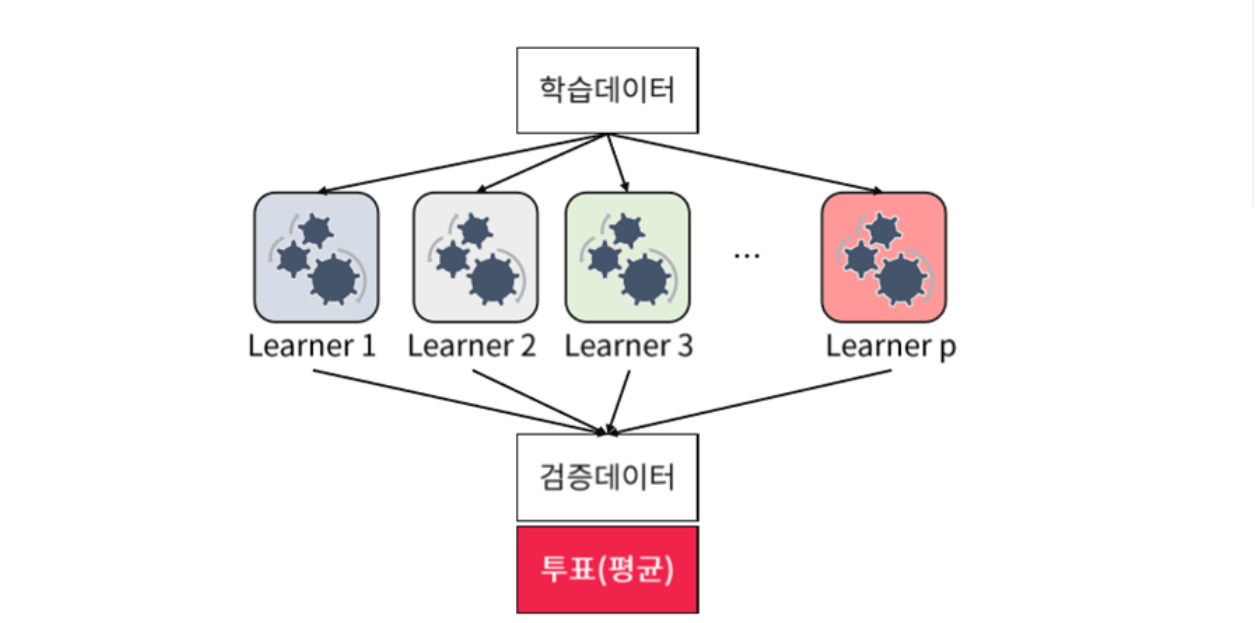

* 앙상블 학습의 유형  
: 보팅(Voting), 배깅(Bagging), 부스팅(Boosting)
  * 공통점: 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식
  * 차이점:  
  보팅- 서로 다른 알고리즘을 가진 분류기를 결합하는 것  
  배깅- 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만, 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 보팅을 수행  
    * 모델: 랜덤 포레스트  
    * 배깅: 교차검증과 다르게 데이터 중첩 허용
    
  * 부스팅: 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에게는 가중치(weight)를 부여하면서 학습과 예측을 진행하는 것
    * 모델: 그래디언트 부스트, XGBoost, LightGBM

  * 스태킹: 여러가지 다른 모델의 예측 결괏값을 다시 학습 데이터로 만들어서 다른 모델(메타모델)로 재학습시켜 결과를 예측하는 방법


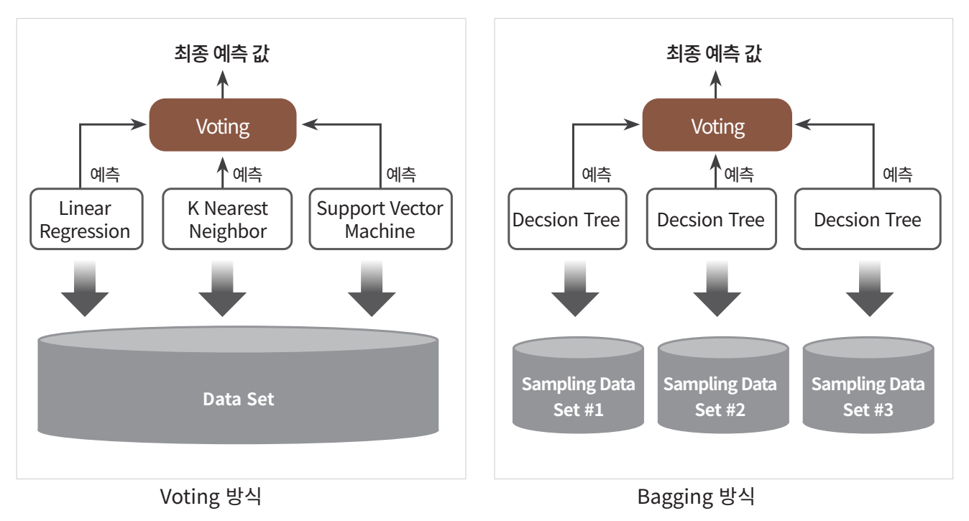

### 보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)
1) **하드 보팅**: 예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정하는 것  
2) **소프트 보팅**: 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정  

* 일반적으로 소프트 보팅의 예측 성능이 좋아서 더 많이 사용됨

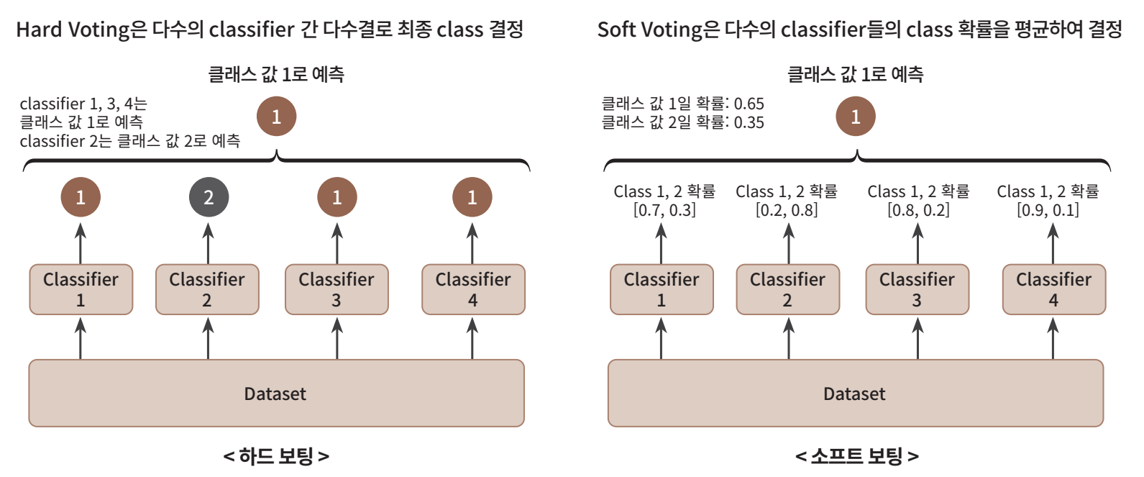

### 보팅 분류기(Voting Classifier)
* 사이킷런의 VotingClassifier 클래스  
: 보팅 방식의 앙상블을 구현

* 위스콘신 유방암 데이터 세트  
: 유방암의 악성종양, 양성종양 여부를 결정하는 이진 분류 데이터 세트  
  종양의 크기, 모양 등의 형태와 관련한 많은 피처를 가지고 있음

* 로지스틱 회귀와 KNN을 기반으로 보팅 분류기를 만들어보기

In [15]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   
2        19.69         21.25           130.0     1203.0          0.10960   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33            184.6   
1                 0.05667  ...         24.99          23.41            158.8   
2                 0.05999  ...         23.57          25.53            152.5   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  

[3 rows x 30 columns]

In [16]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [17]:
# 개별 모델은 로지스틱 회귀와 KNN 임.
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
# estimators: 리스트 값으로 보팅에 사용될 여러 개의 Classifier 객체들을 튜플 형식으로 입력
# voting: 'hard'시 하드 보팅, 'soft'시 소프트 보팅 방식 적용
vo_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft' )

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size=0.2 , random_state= 156)

# VotingClassifier 학습/예측/평가.
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9561
LogisticRegression 정확도: 0.9474
KNeighborsClassifier 정확도: 0.9386


* 보팅, 스태킹 등 : 서로 다른 알고리즘을 기반으로 함
* 배깅과 부스팅 : 대부분 결정 트리 알고리즘을 기반으로 함

# 04 랜덤 포레스트(Random Forest)
### 랜덤 포레스트의 개요 및 실습
* 배깅: 같은 알고리즘으로 여러 개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘  
  * 대표적인 알고리즘: 랜덤포레스트
* **랜덤포레스트**  
  : 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 함
    * 앙상블 알고리즘 중 비교적 빠른 수행 속도
    * 다양한 영역에서 높은 예측 성능
    * 랜덤 포레스트의 기반 알고리즘은 '결정 트리'
  *  RandomForest의 단점:
    1. 하이퍼 파라미터가 너무 많다
    2. 시간이 많이 소모된다
    3. 예측 성능이 크게 향상되는 경우가 많지 않다

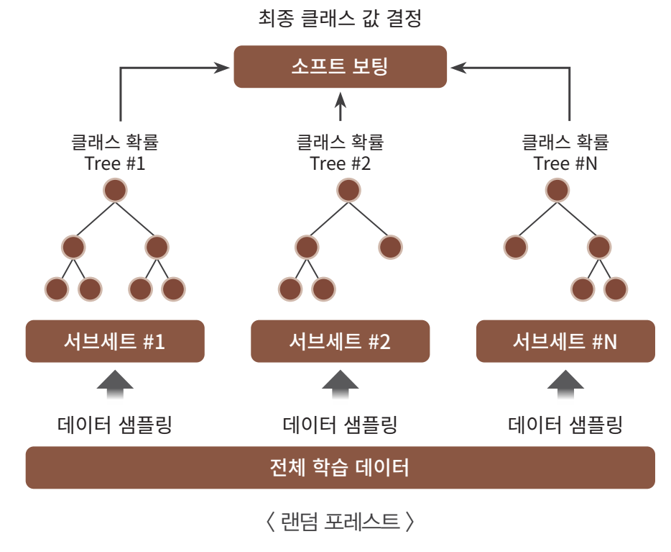

* 랜덤 포레스트에서 사용되는 데이터 세트  
▶전체 데이터에서 일부가 중첩되게 샘플링된 데이터 세트  
▶ 부트스트래핑(bootstrapping)분할 방식   
: 여러 개의 데이터 세트를 중첩되게 분리하는 것

* 즉, 랜덤 포레스트는 데이터가 중첩된 개별 데이터 세트에 결정 트리 분류기를 각각 적용하는 것
* RandomForestClassifier  
: 사이킷런에서 제공하는 함수

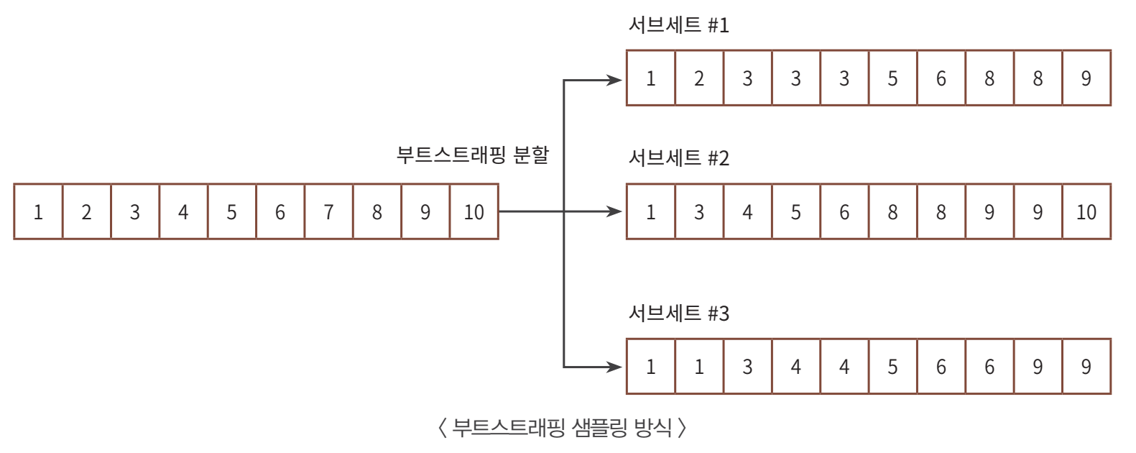

* 사용자 행동 인식 데이터 세트를 RandomForestClassifier를 이용해 예측해보기

In [18]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [21]:
import pandas as pd

# get_human_dataset()를 이용해 학습/테스트용 DataFrame 가져오기
def get_human_dataset( ):

    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])

    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성.
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('X_test.txt',sep='\s+', names=feature_name)

    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('y_test.txt',sep='\s+',header=None,names=['action'])

    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

<ipython-input-18-92110e44b328>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x[1] >0 else x[0] ,  axis=1)
<ipython-input-18-92110e44b328>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset( )을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


### 랜덤 포레스트 하이퍼 파라미터 및 튜닝
* 트리 기반의 앙상블 알고리즘의 단점  
  * 하이퍼 파라미터가 너무 많음
  * 그로 인해 튜닝 시간이 많이 소모됨
  * 튜닝 후 예측 성능이 크게 향상되는 경우가 많지 않음

* GridSearchCV를 이용해 랜덤 포레스트의 하이퍼 파라미터 튜닝하기

In [23]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12],
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


In [24]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9165


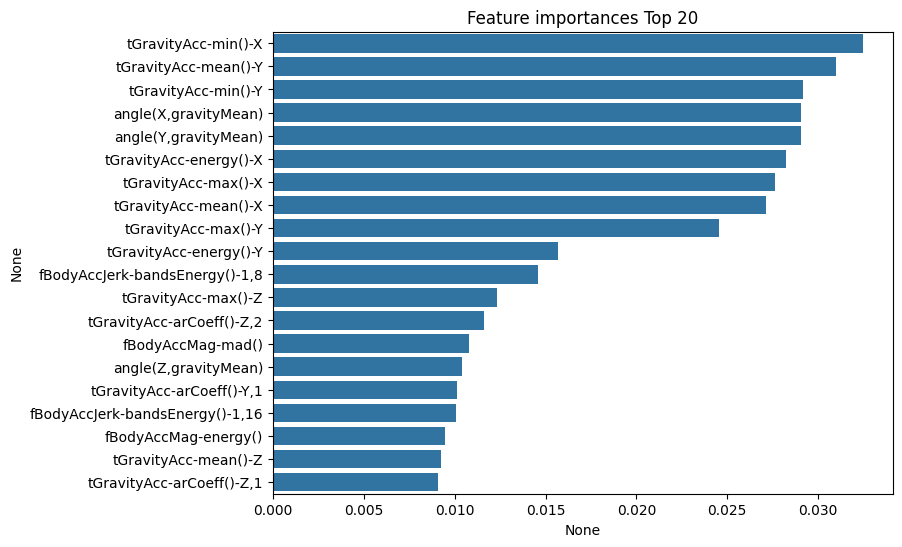

<Figure size 640x480 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('rf_feature_importances_top20.tif', format='tif', dpi=300, bbox_inches='tight')

# 05 GBM(Gradient Boosting Machine)
### GBM의 개요 및 실습
* 부스팅 알고리즘  
: 여러 개의 약한 학습기(weak learner)를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식
  * 대표 알고리즘: AdaBoost(Adaptive boosting), 그래디언트 부스트
    * AdaBoost: 오류 데이터에 가중치를 부여하면서 부스팅을 수행




* 에이다부스트(AdaBoost) 학습 과정



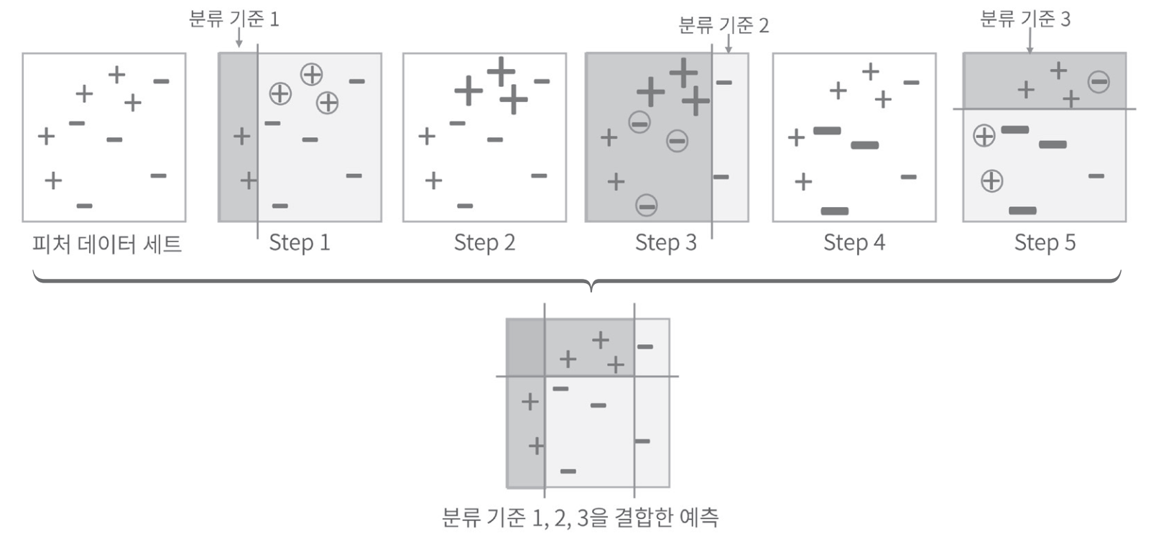

* 개별 약한 학습기는 아래와 같이 각각 가중치를 부여해 결합함

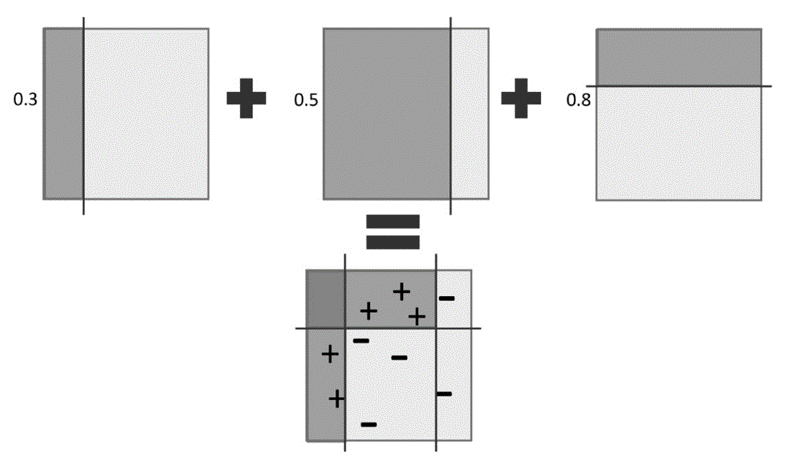

* GBM(Gradient Boost Machine)도 에이다부스트와 유사함
  * 차이점: GBM은 가중치 업데이트를 경사 하강법 사용함
  * GBM -> 분류, 회귀 가능

* GradientBoostingClassifier  
: 사이킷런에서 GBM 기반의 분류 클래스 제공

* 사이킷런의 GBM을 이용해 사용자 행동 데이터 세트를 예측 분류해보기

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))


* 일반적으로 GBM이 랜덤 포레스트보다는 예측 성능이 조금 뛰어난 경우 많음  
  & 과적합에도 강한 뛰어난 예측 성능을 갖고 있음
* 하지만 수행 시간이 오래 걸림(GBM이 극복해야 할 중요한 과제) & 하이퍼 파라미터 튜닝 노력이 필요

### GBM 하이퍼 파라미터 소개
* 수행 시간이 너무 오래 걸리므로 생략

# 06 XGBoost(eXtra Gradient Boost)
### XGBoost 개요
* 캐글경연 대회에서 널리 알려짐
* 분류에 있어서 뛰어난 예측 성능을 나타냄
* GBM에 기반하고 있지만, GBM의 단점인 느린 수행 시간 및 과적합 규제(Regularization) 부재 등의 문제를 해결
* 병렬 CPU 환경에서 병렬 학습이 가능해 기존 GBM보다 빠르게 학습을 완료할 수 있음

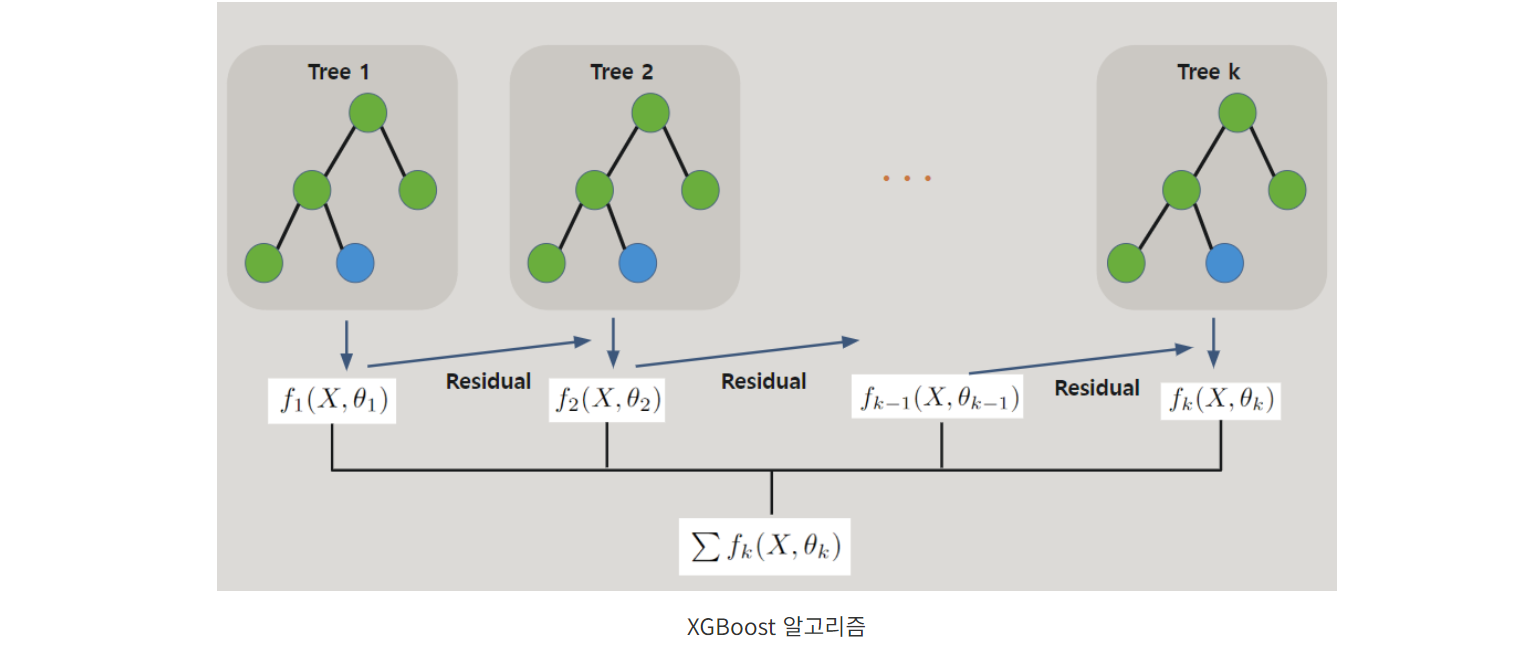

* XGBoost의 주요 장점

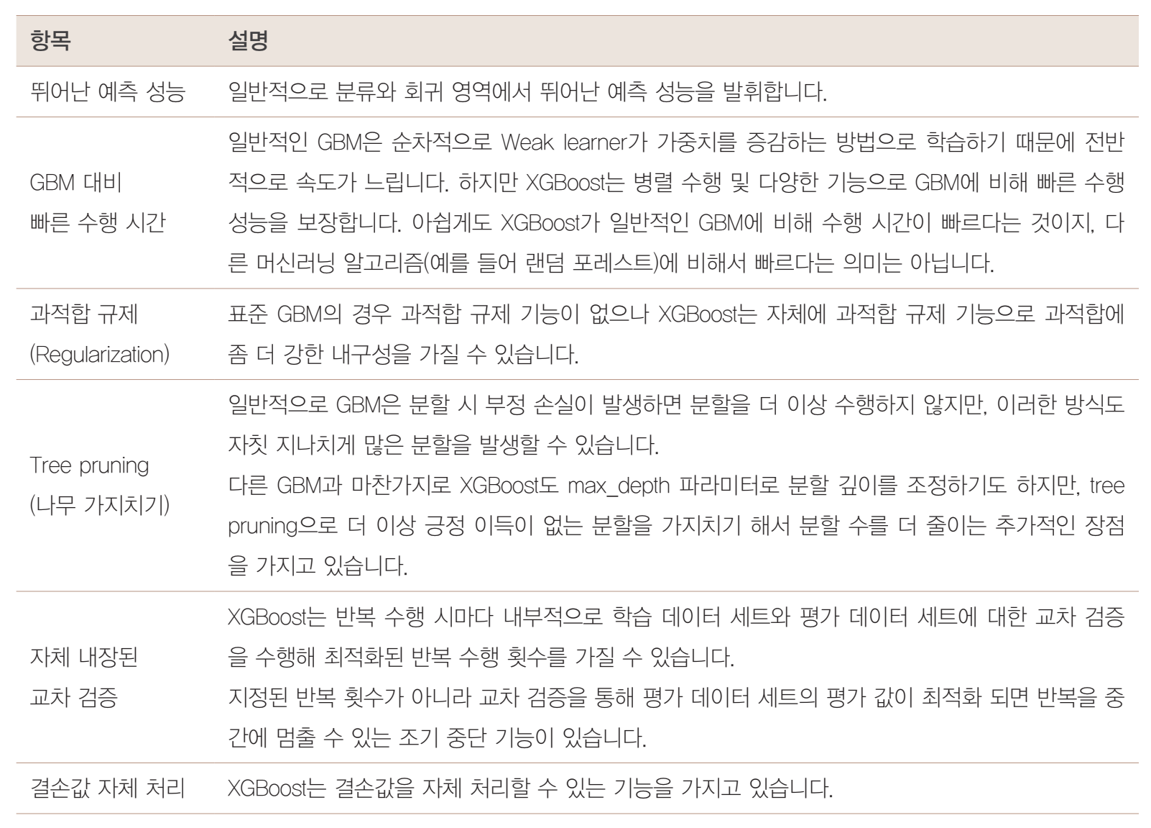

* XGBoost의 핵심 라이브러리는 C/C++로 작성돼 있음
* XGBoost 개발 그룹에서 사이킷런과연동할수 있는 래퍼 클래스(Wrapper class)를 제공  
▶ XGBClssifier, XGBRegressor

### XGBoost 설치하기
: 생략

* XGBoost 버전 확인

In [21]:
import xgboost

print(xgboost.__version__)

2.1.1


### 파이썬 래퍼 XGBoost 하이퍼 파라미터

* XGBoost는 GBM과 유사한 하이퍼 파라미터를 동일하게 가지고 있음
  * 추가 파라미터: 조기 중단(early stopping), 과적합을 규제하기 위한 파라미터 등

* 파라미터 유형 및 종류  
: p.229-230

### * 파이썬 래퍼 XGBoost vs 사이킷런 래퍼 XGBoost

### 1) 파이썬 래퍼 XGBoost 적용 – 위스콘신 유방암 예측

* XGBoost
  * 파이썬 패키지 xgboost는 자체적으로 교차 검증, 성능 평가, 피처 중요도 등의 시각화 기능 갖고 있음
  * 조기 중단 기능 있음 -> num_rounds로 지정
  * GBM과 다르게 병렬 처리와 조기중단 등으로 빠른 수행시간 처리가 가능함

* 위스콘신유방암 데이터 세트
  * 종양의 크기, 모양 등의 다양한 속성값을 기반으로 악성 종양(malignant)인지 양성종양(benign)인지를 분류한데이터 세트
  * XGBoost를 이용해 예측
  * 악성종양=0, 양성종양=1

In [3]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features= dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target']= y_label
cancer_df.head(3)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   
2        19.69         21.25           130.0     1203.0          0.10960   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33            184.6      2019.0   
1                 0.05667  ...          23.41            158.8      1956.0   
2                 0.05999  ...          25.53            152.5      1709.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  

[3 rows x 31 columns]

In [4]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
target
1    357
0    212
Name: count, dtype: int64


In [5]:
# cancer_df에서 feature용 DataFrame과 Label용 Series 객체 추출
# 맨 마지막 칼럼이 Label임. Feature용 DataFrame은 cancer_df의 첫번째 칼럼에서 맨 마지막 두번째 칼럼까지를 :-1 슬라이싱으로 추출.
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

# 데이터 분할 (XGBoost에서 제공하는 검증 성능 평가, 조기중단 수행하기 위해 3가지로 나눔)
# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label,
                                         test_size=0.2, random_state=156 )

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train, test_size=0.1, random_state=156 )
print(X_train.shape , X_test.shape)
print(X_tr.shape, X_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


* XGBoost만의 전용 데이터 객체: DMatrix
  * 때문에 Numpy 또는 Pandas로 되어 있는 학습용, 검증, 테스트용 데이터 세트를 모두 전용의 데이터 객체인 DMatrix로 생성하여 모델에 입력해줘야 함
  * DMatrix의 주요 입력 파라미터  
  : data, label


In [6]:
# 만약 구버전 XGBoost에서 DataFrame으로 DMatrix 생성이 안될 경우 X_train.values로 넘파이 변환.
# 학습, 검증, 테스트용 DMatrix를 생성.
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test , label=y_test)

In [7]:
params = { 'max_depth':3,
          'eta': 0.05,
          'objective':'binary:logistic',
          'eval_metric':'logloss'
         }
num_rounds = 400

* 평가용데이터 세트는 학습과 평가용 데이터 세트를 명기하는 개별 튜플을 가지는 리스트 형태로 설정.  
가령 dtr이 학습용, dval이 평가용이라면 [(dtr,'train),(dval,'eval')]와 같이, 학습용 DMatrix는 'train'으로, 평가용 DMatrix는 'eval'로 개별 튜플에서 명기하여 설정.

* eval_metric은 평가 세트에 적용할 성능 평가 방법. 분류일 경우 주로 'error'(분류 오류), 'logloss'를 적용.

* 위에 지정된 하이퍼 파라미터로 XGBoost 모델을 학습시켜보자
  * 반복 횟수는?
  * eval-logloss가 가장 낮은 값은?
  * 176번째에서 멈춘 이유는?

In [8]:
# 학습 데이터 셋은 'train' 또는 평가 데이터 셋은 'eval' 로 명기합니다.
eval_list = [(dtr,'train'),(dval,'eval')] # 또는 eval_list = [(dval,'eval')] 만 명기해도 무방.

# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params = params , dtrain=dtr , num_boost_round=num_rounds , \
                      early_stopping_rounds=50, evals=eval_list )

[0]	train-logloss:0.62480	eval-logloss:0.63104
[1]	train-logloss:0.58674	eval-logloss:0.60478
[2]	train-logloss:0.55226	eval-logloss:0.58223
[3]	train-logloss:0.52086	eval-logloss:0.56184
[4]	train-logloss:0.49192	eval-logloss:0.54118
[5]	train-logloss:0.46537	eval-logloss:0.52223
[6]	train-logloss:0.44029	eval-logloss:0.50287
[7]	train-logloss:0.41666	eval-logloss:0.48620
[8]	train-logloss:0.39525	eval-logloss:0.46974
[9]	train-logloss:0.37542	eval-logloss:0.45497
[10]	train-logloss:0.35701	eval-logloss:0.44131
[11]	train-logloss:0.33982	eval-logloss:0.43134
[12]	train-logloss:0.32297	eval-logloss:0.41972
[13]	train-logloss:0.30725	eval-logloss:0.40902
[14]	train-logloss:0.29327	eval-logloss:0.39883
[15]	train-logloss:0.27946	eval-logloss:0.38968
[16]	train-logloss:0.26691	eval-logloss:0.38150
[17]	train-logloss:0.25473	eval-logloss:0.37368
[18]	train-logloss:0.24385	eval-logloss:0.36666
[19]	train-logloss:0.23338	eval-logloss:0.35994
[20]	train-logloss:0.22320	eval-logloss:0.35374
[2

* 테스트 데이터 세트에 예측을 수행해보기

In [9]:
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5 보다 크면 1 , 그렇지 않으면 0 으로 예측값 결정하여 List 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:',preds[:10])

predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.938 0.004 0.75  0.049 0.98  1.    0.999 0.999 0.998 0.001]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


* get_clf_eval() 함수를 적용해 XGBoost 모델의 예측 성능 평가

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [11]:
get_clf_eval(y_test , preds, pred_probs)

오차 행렬
[[35  2]
 [ 2 75]]
정확도: 0.9649, 정밀도: 0.9740, 재현율: 0.9740,    F1: 0.9740, AUC:0.9965


* 피처의 중요도 확인
  * plot_importance 함수 사용

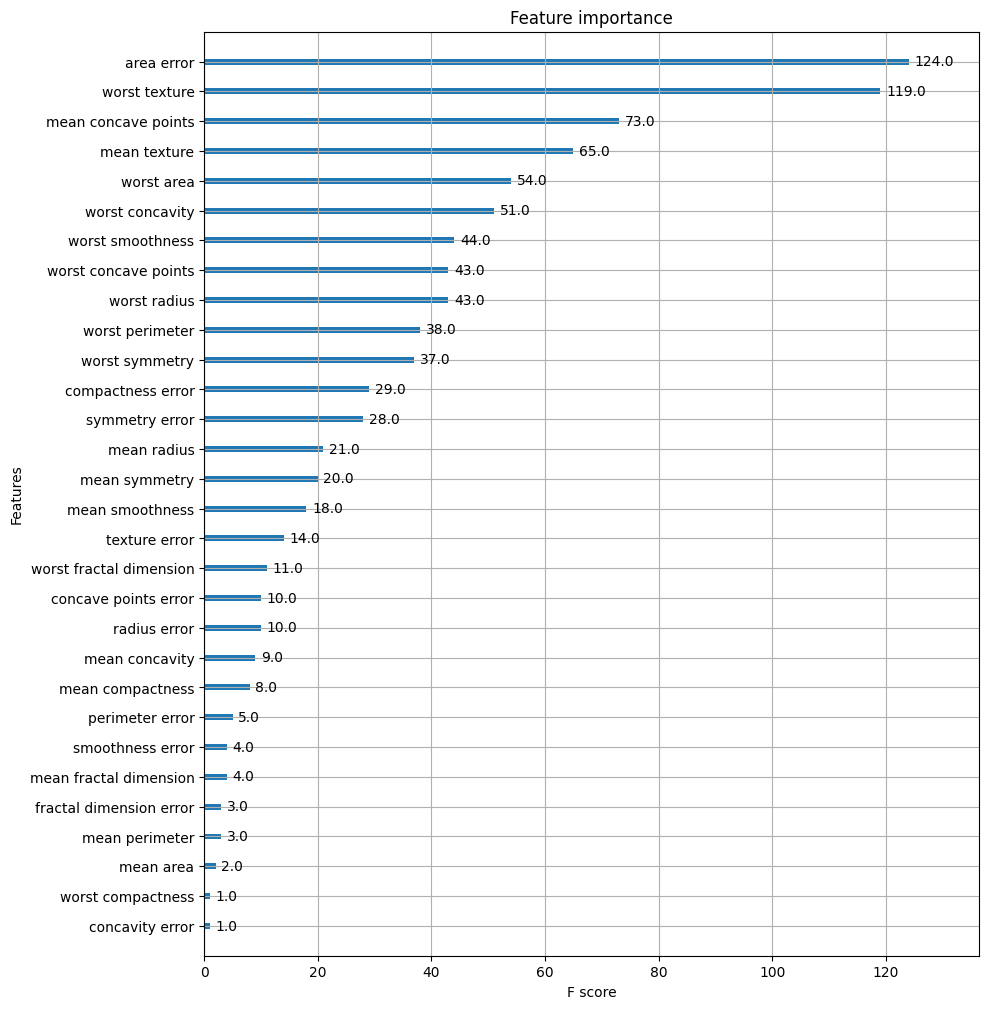

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)
plt.savefig('p239_xgb_feature_importance.tif', format='tif', dpi=300, bbox_inches='tight')

### 2) 사이킷런 래퍼 XGBoost의 개요 및 적용
* 앞서 사용한 '파이썬 래퍼 XGBoost'의 하이퍼 파라미터에 약간의 차이가 있음
  * (파이썬 래퍼 -> 사이킷런 래퍼)
  * eta -> learning_rate
  * sub_sample -> subsample
  * lambda -> reg_lambda
  * alpha -> reg_alpha
  * num_boost_round -> n_estimators

In [13]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [14]:
get_clf_eval(y_test , w_preds, w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,    F1: 0.9806, AUC:0.9947


In [28]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]

# 오류 발생 지점
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)

ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

TypeError: XGBClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'

In [29]:
get_clf_eval(y_test , ws100_preds, ws100_pred_proba)

NameError: name 'ws100_preds' is not defined

In [30]:
# early_stopping_rounds를 10으로 설정하고 재 학습.
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10,
                eval_metric="logloss", eval_set=evals,verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test , ws10_preds, ws10_pred_proba)

TypeError: XGBClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'

NotFittedError: need to call fit or load_model beforehand

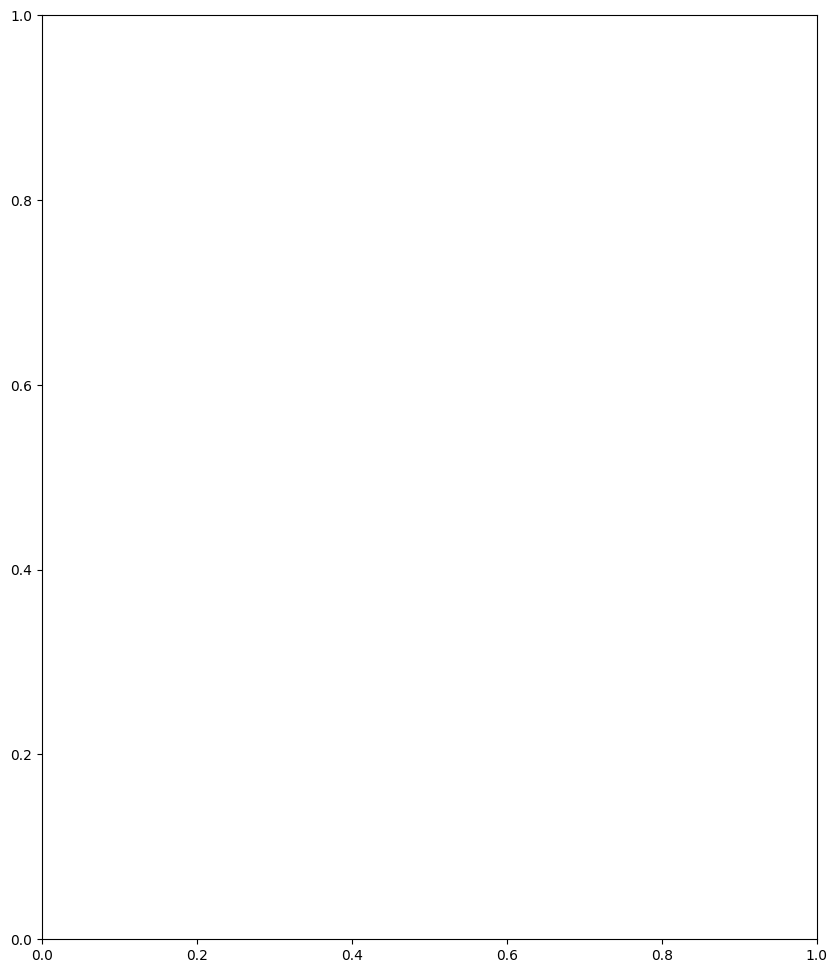

In [31]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방.
plot_importance(xgb_wrapper, ax=ax)


# 07 LightGBM

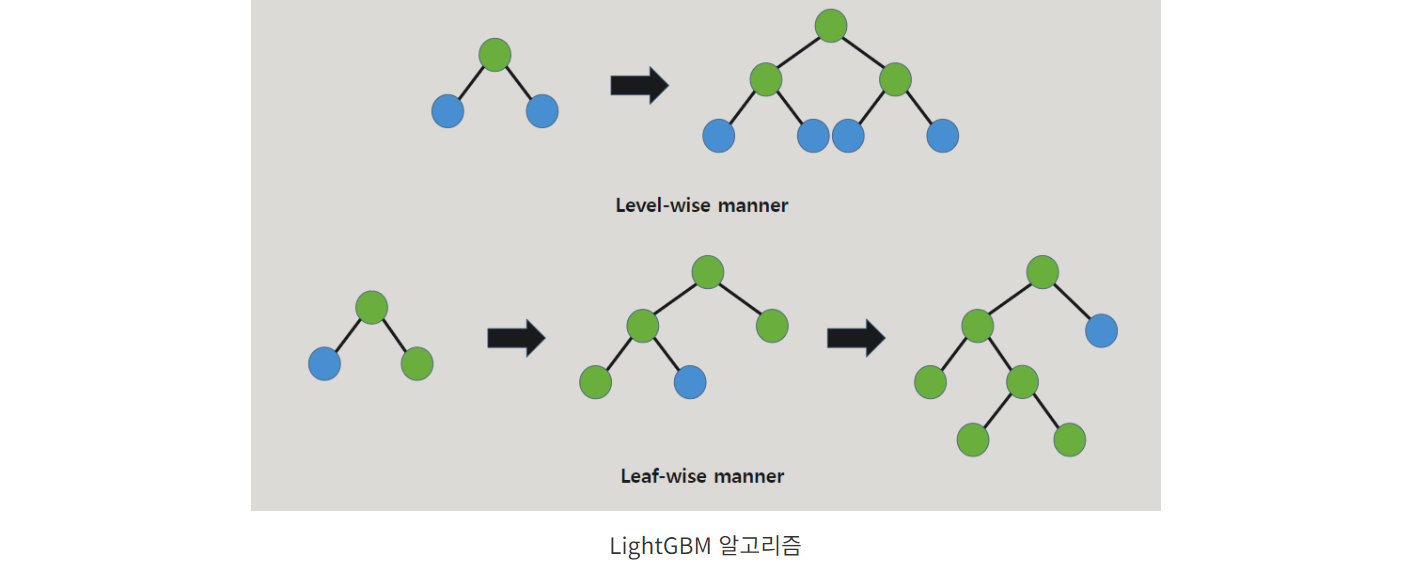

* XGBoost
  * 매우 뛰어난 부스팅 알고리즘
  * 하지만 여전히 학습 시간이 오래 걸림
  * GBM보다는 빠름
  * 하지만 대용량 데이터의 경우 만족할만한 학습 성능을 기대하려면 많은 CPU 코어를 가진 시스템에서 학습을 진행해야 함

* LightGBM 장점
  * XGBoost보다 더 빠른 학습과 예측 수행 시간
  * 메모리 사용량도 상대적으로 적음
  * XGBoost의 예측 성능은 별차이 없음
  * 기능이 더 많음
  * 카테고리형 피처의 자동 변환과 최적 분할(원-핫 인코딩 등을 사용하지 않고도 카테고리형 피처를 최적으로 변환하고 이에 따른 노드 분할 수행)

* LightGBM 단점
  * 적은 데이터 세트(10,000건 이하)에 적용할 경우 과적합 발생 가능성 높음


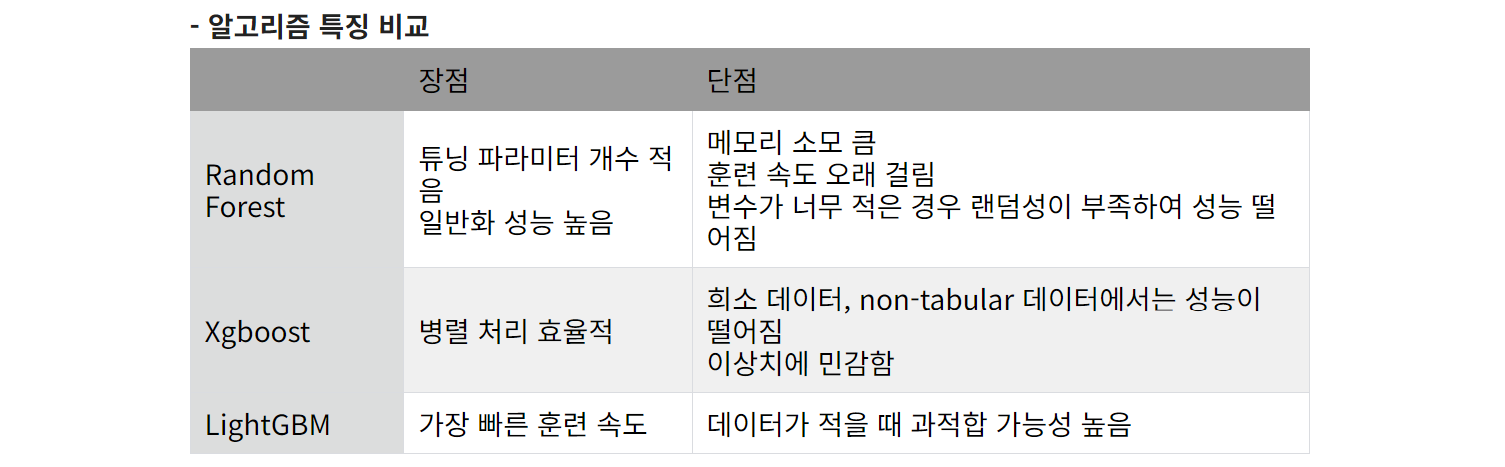

* LightGBM  
: 리프 중심 트리 분할(Leaf Wise)방식 사용
  
* 리프 중심 트리 분할 방식  
: 트리의 균형을 맞추지 않고, 최대 손실 값(max delta loss)을 가지는 리프 노드를 지속적으로 분할하면서 트리의 깊이가 깊어지고 비대칭적인 규칙 트리 생성  
▶ 학습을 반복할수록 균형 트리 분할 방식보다 예측 오류 손실을 최소화할 수 있음

  
* 균형 트리 분할(Level Wise)  
  * 오버 피팅에 좀 더 강한 구조를 가짐
  * 하지만 균형을 맞추기 위한 시간이 필요함
  

* LightGBM의 파이썬 패키지명  
: lightgbm

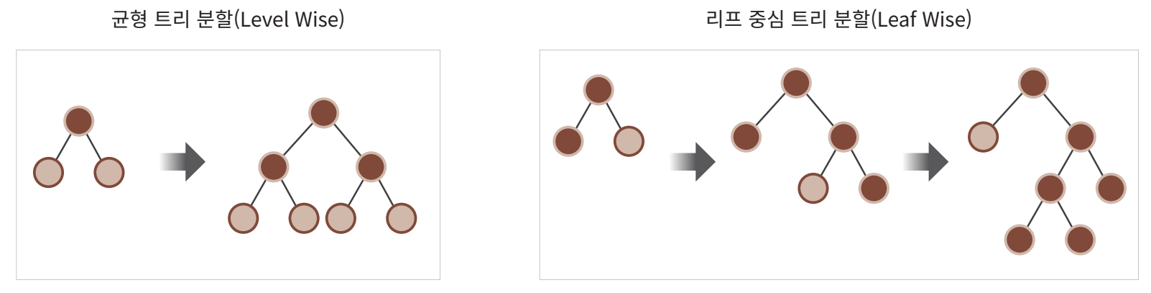

### LightGBM 설치
* p.246-247 참고

In [32]:
import lightgbm

print(lightgbm.__version__)

4.4.0


### LightGBM 하이퍼 파라미터
* XGBoost와 많은 부분 유사함
* 주의할 점  
: 리프 노드가 계속 분할되면서, 트리의 깊이가 깊어짐  
▶ 하이퍼 파라미터 설정 필요함

* p.247-248 참고

### 하이퍼 파라미터 튜닝 방안
* num_leaves는 개별 트리가 가질 수 있는 최대 리프의 개수이고 LightGBM 모델의 복잡도를 제어하는 주요 파라미터임.일반적으로 num_leaves의 개수를 높이면 정확도가 높아지지만, 반대로 트리의 깊이가 깊어지고 **모델이 복잡도**가 커져 과적합 영향도가 커집니다.

* min_data_in_leaf는 사이킷런 래퍼 클래스에서는 min_child_samples로 이름이 바뀝니다. **과적합을 개선**하기 위한 중요한 파라미터입니다. num_leaves와 학습 데이터의 크기에 따라 달라지지만, 보통 큰 값으로 설정하면 트리가 깊어지는 것을 방지합니다.

* max_depth는 명시적으로 깊이의 크기를 제한합니다. num_leaves, min_data_in_leaf와 결합해 **과적합을 개선**하는데 사용합니다.


### 파이썬 래퍼 LightGBM과 사이킷런 래퍼 XGBoost, LightGBM 하이퍼 파라미터 비교

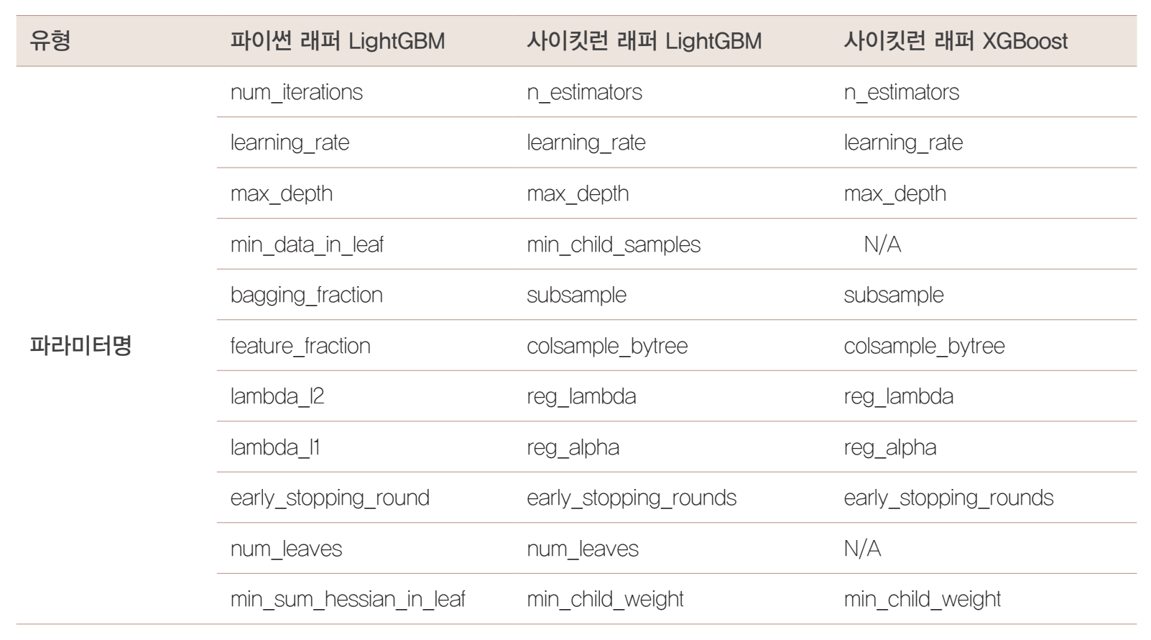

### LightGBM 적용 – 위스콘신 유방암 예측(Breast Cancer Prediction)
* LightGBM의 파이썬 패키지  
: LGBMClassifier

In [33]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()

cancer_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
cancer_df['target']= dataset.target
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label, test_size=0.2, random_state=156 )

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train, test_size=0.1, random_state=156 )

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정.
lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=0.05)

#LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능.
evals = [(X_test, y_test)]

# Use early_stopping callback and logging
lgbm_wrapper.fit(X_train, y_train,  eval_metric="logloss",
                 eval_set=evals,
                 callbacks=[lightgbm.early_stopping(100),
                            lightgbm.log_evaluation(1)]) # Log evaluation results every round

# 주석 처리된 코드 삭제
#lgbm_wrapper.fit(X_train, y_train, **{'early_stopping_rounds': 100, 'eval_metric': "logloss", 'eval_set': evals, 'verbose': True})

preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 280, number of negative: 175
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000500 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4542
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.615385 -> initscore=0.470004
[LightGBM] [Info] Start training from score 0.470004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_logloss: 0.600521
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_logloss: 0.566786
[LightGBM] [Warning] No further splits with positive gain, best 

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [35]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[33  4]
 [ 1 76]]
정확도: 0.9561, 정밀도: 0.9500, 재현율: 0.9870,    F1: 0.9682, AUC:0.9923


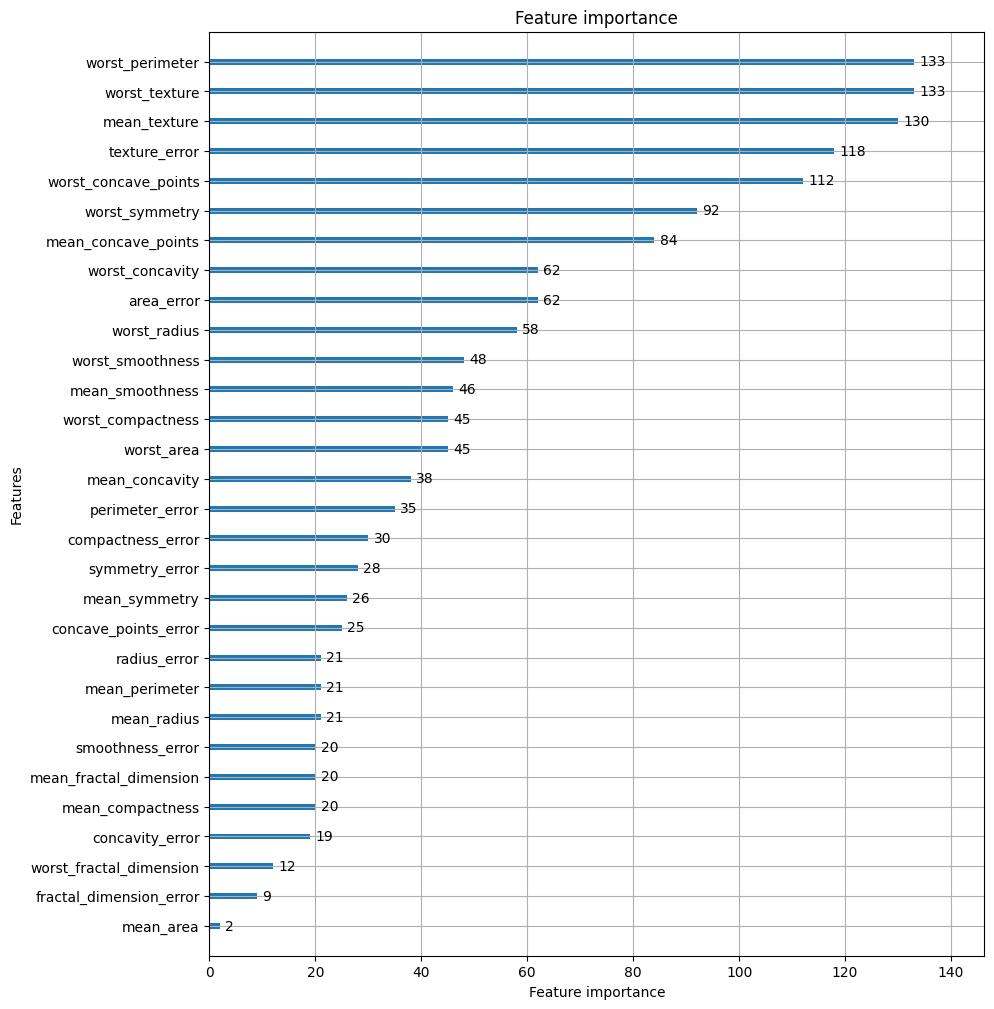

In [36]:
# plot_importance( )를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)
plt.savefig('lightgbm_feature_importance.tif', format='tif', dpi=300, bbox_inches='tight')

# 08 베이지안최적화 기반의 HyperOpt를 이용한 하이퍼 파라미터 튜닝

* Grid Search 방식 단점  
  * 튜닝해야 할 하이퍼 파라미터 개수가 많을 경우, 최적화 수행 시간이 오래 걸림 (ex.XGBoost)
  
  

### 베이지안 최적화 개요
* 베이지안 확률  
: 새로운 사건의 관측이나 새로운 샘플 데이터를 기반으로 사후 확률을 개선해 나감
* 베이지안 최적화  
  * 베이지안 확률에 기반을 두고 있는 최적화 기법  
  * 새로운 데이터를 입력받았을 때 최적 함수를 예측하는 사후 모델을 개선해 나가면서 최적 함수 모델을 만들어 냄

* 베이지안 최적화를 구성하는 두 가지 중요 요소
  * 대체 모델(Surrogate Model)  
  : 획득 함수로부터 최적 함수를 예측할 수 있는 입력값을 추천 받은 뒤 이를 기반으로 최적 함수 모델을 개선해 나감
    
  * 획득 함수(Acquisition Function)  
  : 개선된 대체 모델을 기반으로 최적 입력값을 계산함


* 대체 모델은 획득 함수가 계산한 하이퍼 파라미터를 입력받으면서 점차적으로 개선되며, 개선된 대체 모델을 기반으로 획득 함수는 더 정확한 하이퍼 파라미터를 계산할 수 있게 됨

* 최적 입력값이 하이퍼 파라미터가 됨

#### 베이지안 최적화(참고 https://data-scientist-brian-kim.tistory.com/88)

* Step 1
  * 최초에는 랜덤하게 하이퍼 파라미터들을 샘플링하고 성능 결과를 관측
  * 아래 그림에서 검은색 원은 특정 하이퍼 파라미터가 입력되었을 때 관측된 성능 지표 결괏값을 뜻하며 주황색 사선은 찾아야 할 목표 최적함수

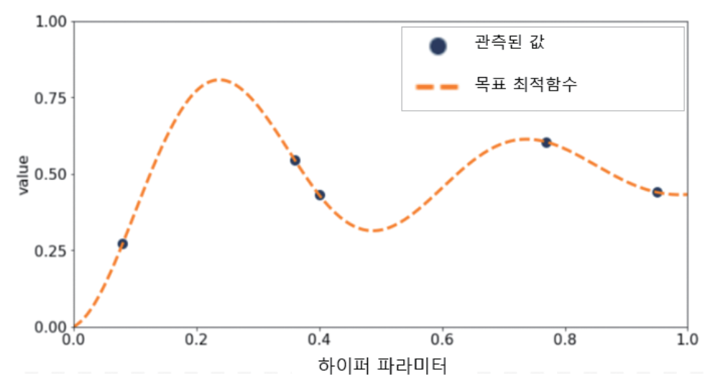

* Step 2  
  * 관측된 값을 기반으로 대체 모델은 최적 함수를 추정
  * 아래 그림에서 파란색 실선은 대체 모델이 추정한 최적 함수
  * 옅은 파란색으로 되어 있는 영역은 예측된 함수의 신뢰 구간(추정된 함수의 결괏값 오류 편차를 의미하며 추정 함수의 불확실성을 나타냄)
  * 최적 관측값은 y축 value에서 가장 높은 값을 가질 때의 하이퍼 파라미터


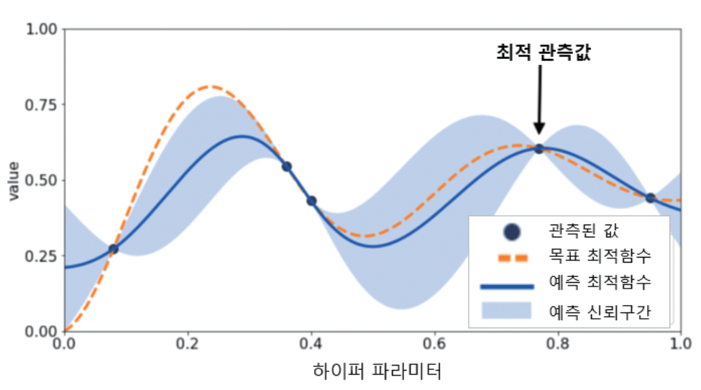

* Step 3  
  * 추정된 최적 함수를 기반으로 획득 함수(Acquisition Function)는 다음으로 관측할 하이퍼 파라미터 값을 계산
  * 획득 함수는 이전의 최적 관측값보다 더 큰 최댓값을 가질 가능성이 높은 지점을 찾아서 다음에 관측할 하이퍼 파라미터를 대체 모델에 전달

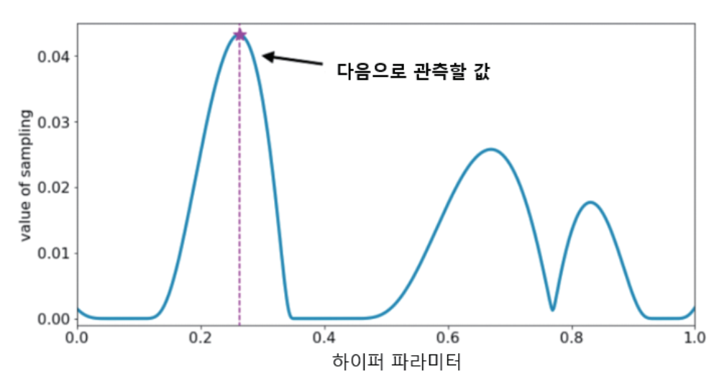

*  Step 4  
  * 획득 함수로부터 전달된 하이퍼 파라미터를 수행하여 관측된 값을 기반으로 대체 모델은 갱신되어 다시 최적 함수를 예측 추정

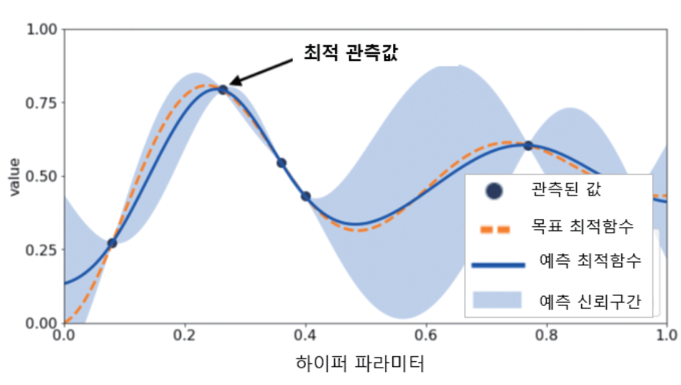

 * step 3와 step 4를 특정 횟수만큼 반복하면 대체 모델의 불확실성이 개선되고 점차 정확한 최적 함수 추정이 가능하게 됨
  
* 대체 모델
  * 일반적으로 가우시안 프로세스(Gaussian Process)
  * 트리 파르젠 Estimator(TPE, Tree-structure Parzen Estimator)

* 베이지안 최적화 제공되는 파이썬 패키지들  
: HyperOpt, Bayesian Optimization, Optuna 등

### HyperOpt 사용하기

* HyperOpt 사용 시 유의할 점  
: 목적 함수 반환 값의 최댓값이 아닌 최솟값을 가지는 최적 입력값을 유추해야 함

In [37]:
#!pip install hyperopt

In [38]:
import hyperopt

print(hyperopt.__version__)

0.2.7


* HyperOpt의 hp모듈을 이용하여 입력 변수명과 입력값의 검색공간을 설정하기

In [39]:
from hyperopt import hp

# -10 ~ 10까지 1간격을 가지는 입력 변수 x와 -15 ~ 15까지 1간격으로 입력 변수 y 설정.
search_space = {'x': hp.quniform('x', -10, 10, 1), 'y': hp.quniform('y', -15, 15, 1) }

* 목적함수 생성하기

In [40]:
from hyperopt import STATUS_OK

# 목적 함수를 생성. 변숫값과 변수 검색 공간을 가지는 딕셔너리를 인자로 받고, 특정 값을 반환
def objective_func(search_space):
    x = search_space['x']
    y = search_space['y']
    retval = x**2 - 20*y

    return retval

* 목적 함수의 반환값이 최소가 될 수 있는 최적의 입력값을 베이지안 최적화 기법에 기반하여 찾기  
▶ fmin() 함수에서 이러한 기능 제공함
  
* search_space에서 목적 함수 object_func의 최솟값을 반환하는 최적 입력 변숫값을 찾을 수 있도록 베이지안 최적화 수행하기

In [41]:
from hyperopt import fmin, tpe, Trials
import numpy as np

# 입력 결괏값을 저장한 Trials 객체값 생성.
trial_val = Trials()

# 목적 함수의 최솟값을 반환하는 최적 입력 변숫값을 5번의 입력값 시도(max_evals=5)로 찾아냄.
best_01 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=5
               , trials=trial_val, rstate=np.random.default_rng(seed=0))
print('best:', best_01)

100%|██████████| 5/5 [00:00<00:00, 301.45trial/s, best loss: -224.0]
best: {'x': -4.0, 'y': 12.0}


* 입력 변수 x의 공간 -10 ~ 10, y의 공간 -15 ~ 15에서 목적 함수의 반환값을 x**2 -20*y로 설정
  * x는 에0 가울수록 y는 15에 가까울수록 반환값이 최소로 근사
  * 확실하게 만족할 수준의 최적 x와 y값을 찾은 것은 아니지만, 5번의 수행으로 어느 정도 최적값에 다가설 수 있었다는 점은 주지할만하다.


In [42]:
trial_val = Trials()

# max_evals를 20회로 늘려서 재테스트
best_02 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=20
               , trials=trial_val, rstate=np.random.default_rng(seed=0))
print('best:', best_02)

100%|██████████| 20/20 [00:00<00:00, 329.50trial/s, best loss: -296.0]
best: {'x': 2.0, 'y': 15.0}


* max_evals=20으로 재테스트 시 x는 2, y는 15로 만족할 수준의 최적 x와 y값을 찾음
* 만일 그리드 서치와 같이 순차적으로 x, y 변수값을 입력해서 최소 함수 반환값을 찾는다면, 입력값 x는 -10 ~ 10까지 21개의 경우의 수, 입력값 y는 -15 ~ 15까지 31개의 경우의 수로 21*31=651회의 반복이 필요
* 베이지안 최적화를 이용해서 는 20회의 반복만으로 일정 수준의 최적값을 근사해 낼 수 있다.

→베이지안 최적화 방식은 상대적으로 최적값을 찾는 시간을 많이 줄여 줌

* Trials 객체의 results와 vals 속성은 HyperOpt의 fmin() 함수의 수행 시마다 최적화되는 경과를 볼 수 있는 함수 반환값과 입력 변숫값들의 정보를 제공해줌

In [43]:
# fmin( )에 인자로 들어가는 Trials 객체의 result 속성에 파이썬 리스트로 목적 함수 반환값들이 저장됨
# 리스트 내부의 개별 원소는 {'loss':함수 반환값, 'status':반환 상태값} 와 같은 딕셔너리임.
print(trial_val.results)

[{'loss': -64.0, 'status': 'ok'}, {'loss': -184.0, 'status': 'ok'}, {'loss': 56.0, 'status': 'ok'}, {'loss': -224.0, 'status': 'ok'}, {'loss': 61.0, 'status': 'ok'}, {'loss': -296.0, 'status': 'ok'}, {'loss': -40.0, 'status': 'ok'}, {'loss': 281.0, 'status': 'ok'}, {'loss': 64.0, 'status': 'ok'}, {'loss': 100.0, 'status': 'ok'}, {'loss': 60.0, 'status': 'ok'}, {'loss': -39.0, 'status': 'ok'}, {'loss': 1.0, 'status': 'ok'}, {'loss': -164.0, 'status': 'ok'}, {'loss': 21.0, 'status': 'ok'}, {'loss': -56.0, 'status': 'ok'}, {'loss': 284.0, 'status': 'ok'}, {'loss': 176.0, 'status': 'ok'}, {'loss': -171.0, 'status': 'ok'}, {'loss': 0.0, 'status': 'ok'}]


In [44]:
# Trials 객체의 vals 속성에 {'입력변수명':개별 수행 시마다 입력된 값 리스트} 형태로 저장됨.
print(trial_val.vals)

{'x': [-6.0, -4.0, 4.0, -4.0, 9.0, 2.0, 10.0, -9.0, -8.0, -0.0, -0.0, 1.0, 9.0, 6.0, 9.0, 2.0, -2.0, -4.0, 7.0, -0.0], 'y': [5.0, 10.0, -2.0, 12.0, 1.0, 15.0, 7.0, -10.0, 0.0, -5.0, -3.0, 2.0, 4.0, 10.0, 3.0, 3.0, -14.0, -8.0, 11.0, -0.0]}


* Trials 객체의 result와 vals 속성은 HyperOpt의 fmin() 함수의 수행 시마다 최적화되는 경과를 볼 수 있는 함수 반환값과 입력 변수값들의 정보를 제공

In [45]:
# 가독성을 높이기 위해 DataFrame으로 만들어서 확인
import pandas as pd

# results에서 loss 키값에 해당하는 밸류들을 추출하여 list로 생성.
losses = [loss_dict['loss'] for loss_dict in trial_val.results]

# DataFrame으로 생성.
result_df = pd.DataFrame({'x': trial_val.vals['x'], 'y': trial_val.vals['y'], 'losses': losses})
result_df

x     y  losses
0   -6.0   5.0   -64.0
1   -4.0  10.0  -184.0
2    4.0  -2.0    56.0
3   -4.0  12.0  -224.0
4    9.0   1.0    61.0
5    2.0  15.0  -296.0
6   10.0   7.0   -40.0
7   -9.0 -10.0   281.0
8   -8.0   0.0    64.0
9   -0.0  -5.0   100.0
10  -0.0  -3.0    60.0
11   1.0   2.0   -39.0
12   9.0   4.0     1.0
13   6.0  10.0  -164.0
14   9.0   3.0    21.0
15   2.0   3.0   -56.0
16  -2.0 -14.0   284.0
17  -4.0  -8.0   176.0
18   7.0  11.0  -171.0
19  -0.0  -0.0     0.0

### HyperOpt를 이용한 XGBoost 하이퍼 파라미터 최적화
* 최적화 방법   
  (1) 적용해야 할 하이퍼 파라미터와 검색 공간 설정  
  (2) 목적 함수에서 XGBoost를 학습 후에 예측 성능 결과를 반환 값으로 설정  
  (3) fmin() 함수에서 목적 함수를 하이퍼 파라미터 검색 공간의 입력값들을 사용하여 최적의 예측 성능 결과를 반환하는 최적 입력값들을 결정

* 유의해야 할 사항
  * HyperOpt는 입력값과 반환 값이 모두 실수형이기 때문에 하이퍼 파라미터 입력 시 정수형으로 형변환을 해줘야 함
  * HyperOpt의 목적 함수는 최솟값을 반환할 수 있도록 최적화해야 하기 때문에 성능 값이 클수록 좋은 성능 지표일 경우 -1을 곱해 줘야 함

In [46]:
# 아래 코드는 이전에 수록된 코드라 책에는 싣지 않았습니다.
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()

cancer_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
cancer_df['target']= dataset.target
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

In [47]:
# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label, test_size=0.2, random_state=156 )

# 앞에서 추출한 학습 데이터를 다시 학습과 검증 데이터로 분리
X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train, test_size=0.1, random_state=156 )

In [48]:
from hyperopt import hp

# max_depth는 5에서 20까지 1간격으로, min_child_weight는 1에서 6까지 1간격으로
# colsample_bytree는 0.5에서 0.95 사이, learning_rate는 0.01에서 0.2 사이 정규 분포된 값으로 검색.
xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 20, 1),
                    'min_child_weight': hp.quniform('min_child_weight', 1, 2, 1),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
                   }

* 목적 함수 만들기
  * 목적 변수 반환값은 교차 검증 기반의 평균 정확도

In [49]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from hyperopt import STATUS_OK

# fmin()에서 입력된 search_space 값으로 입력된 모든 값은 실수형임.
# XGBClassifier의 정수형 하이퍼 파라미터는 정수형 변환을 해줘야 함.
# 정확도는 높을수록 더 좋은 수치임. -1 * 정확도를 곱해서 큰 정확도 값일수록 최소가 되도록 변환
def objective_func(search_space):
    # 수행 시간 절약을 위해 nestimators는 100으로 축소
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),
                            learning_rate=search_space['learning_rate'],
                            colsample_bytree=search_space['colsample_bytree'],
                            eval_metric='logloss')
    accuracy = cross_val_score(xgb_clf, X_train, y_train, scoring='accuracy', cv=3)

    # accuracy는 cv=3 개수만큼 roc-auc 결과를 리스트로 가짐. 이를 평균해서 반환하되 -1을 곱함.
    return {'loss':-1 * np.mean(accuracy), 'status': STATUS_OK}


* fmin()을 이용해 최적 하이퍼 파라미터 도출

In [50]:
from hyperopt import fmin, tpe, Trials

trial_val = Trials()
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trial_val, rstate=np.random.default_rng(seed=9))
print('best:', best)


100%|██████████| 50/50 [07:26<00:00,  8.94s/trial, best loss: -0.9670616939700244]
best: {'colsample_bytree': 0.5026505409854508, 'learning_rate': 0.19828428817109603, 'max_depth': 15.0, 'min_child_weight': 1.0}


In [51]:
print('colsample_bytree:{0}, learning_rate:{1}, max_depth:{2}, min_child_weight:{3}'.format(
    round(best['colsample_bytree'], 5), round(best['learning_rate'], 5),
    int(best['max_depth']), int(best['min_child_weight'])))

colsample_bytree:0.50265, learning_rate:0.19828, max_depth:15, min_child_weight:1


In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

* 도출된 최적 하이퍼 파라미터들을 이용해서 XGBClassifier를 재학습한 후 성능 평가 결과를 확인

In [53]:
xgb_wrapper = XGBClassifier(n_estimators=400,
                            learning_rate=round(best['learning_rate'], 5),
                            max_depth=int(best['max_depth']),
                            min_child_weight=int(best['min_child_weight']),
                            colsample_bytree=round(best['colsample_bytree'], 5)
                           )

evals = [(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric='logloss',
                eval_set=evals, verbose=True)

preds = xgb_wrapper.predict(X_test)
pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, preds, pred_proba)


TypeError: XGBClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'